In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import shutil

In [2]:
def plot_vertical_profile(df, linewidth=1):
    
    for flight_id, flight_df in df.groupby(level='flightId'):
        flight_states_df = df.loc[(flight_id,), :]
        
        flight_states_df =flight_states_df.sort_index(level=['sequence'], ascending = False)
        
        if not flight_states_df.empty:

            opensky_states_altitudes = flight_df['altitude'].tolist()
            opensky_states_times = flight_df.index.get_level_values('sequence').tolist()
            
            plt.plot(opensky_states_times, opensky_states_altitudes, color='k', linewidth=linewidth)

In [3]:
def plot_vertical_profile_flight(df, title, linewidth=1):
    
    fig, ax = plt.subplots(1, 1,figsize=(6,4))
    
    for flight_id, flight_df in df.groupby(level='flightId'):
        flight_states_df = df.loc[(flight_id,), :]
        
        flight_states_df =flight_states_df.sort_index(level=['sequence'], ascending = False)
        
        if not flight_states_df.empty:

            opensky_states_altitudes = flight_df['altitude'].tolist()
            opensky_states_times = flight_df.index.get_level_values('sequence').tolist()
            
            plt.plot(opensky_states_times, opensky_states_altitudes, color='k', linewidth=linewidth)
    plt.title(title)

# Data uploading

In [4]:
date = 191031

In [22]:
filename = "../Opensky/Data/ESSA/2019/osn_ESSA_tracks_around50NM_2019/osn_arrival_ESSA_tracks_around50NM_2019_10_week5.csv"
tracks_df = pd.read_csv(filename, sep=' ',
    names = ['flightId', 'sequence', 'origin', 'endDate', 'callsign', 'icao24', 'timestamp', 'lat', 'lon', 'altitude'],
    index_col=[0,1], dtype={'flightId':str, 'sequence':int, 'endDate':str})
print(len(tracks_df.groupby(level='flightId')))

883


In [20]:
filename = "../Opensky/Data/ESSA/2019/osn_ESSA_states_around50NM_2019_downloaded/osn_arrival_ESSA_states_around50NM_2019_10_week5.csv"
downloaded_df = pd.read_csv(filename, sep=' ',
    names = ['flightId', 'sequence', 'timestamp', 'lat', 'lon', 'altitude', 'velocity', 'beginDate', 'endDate'])
    #names = ['flightId', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'beginDate', 'endDate'])
downloaded_df.set_index(['flightId', 'sequence'], inplace = True)
downloaded_df = downloaded_df.loc[downloaded_df['endDate']==date]
downloaded_ids_list = set(downloaded_df.index.get_level_values(0))
print(len(downloaded_df.groupby(level='flightId')))

300


In [5]:
filename = "../Opensky/Data/ESSA/2019/osn_ESSA_states_around50NM_2019_downloaded/osn_arrival_ESSA_states_around50NM_2019_10_week5.csv"
downloaded_df = pd.read_csv(filename, sep=' ',
    names = ['flightId', 'sequence', 'timestamp', 'lat', 'lon', 'altitude', 'velocity', 'beginDate', 'endDate'])
    #names = ['flightId', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'beginDate', 'endDate'])
downloaded_df.set_index(['flightId', 'sequence'], inplace = True)
downloaded_df = downloaded_df.loc[downloaded_df['endDate']==date]
downloaded_ids_list = set(downloaded_df.index.get_level_values(0))
print(len(downloaded_df.groupby(level='flightId')))

300


In [6]:
filename = "../Opensky/Data/ESSA/2019/osn_ESSA_states_around50NM_2019_fixed_lat_lon/osn_arrival_ESSA_states_around50NM_fixed_lat_lon_2019_10_week5.csv"
fixed_latlon_df = pd.read_csv(filename, sep=' ',
    names = ['flightId', 'sequence', 'timestamp', 'lat', 'lon', 'altitude', 'velocity', 'beginDate', 'endDate'])
    #names = ['flightId', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'beginDate', 'endDate'])
fixed_latlon_df.set_index(['flightId', 'sequence'], inplace = True)
fixed_latlon_df = fixed_latlon_df.loc[fixed_latlon_df['endDate']==date]
print(len(fixed_latlon_df.groupby(level='flightId')))

300


In [7]:
filename = "../Opensky/Data/ESSA/2019/osn_ESSA_states_50NM_2019_extracted/osn_arrival_ESSA_states_50NM_extracted_2019_10_week5.csv"
extracted_df = pd.read_csv(filename, sep=' ',
    names = ['flightId', 'sequence', 'timestamp', 'lat', 'lon', 'altitude', 'velocity', 'beginDate', 'endDate'])
    #names = ['flightId', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'beginDate', 'endDate'])
extracted_df.set_index(['flightId', 'sequence'], inplace = True)
extracted_df = extracted_df.loc[extracted_df['endDate']==date]
print(len(extracted_df.groupby(level='flightId')))

300


In [8]:
filename = "../Opensky/Data/ESSA/2019/osn_ESSA_states_50NM_2019_filtered_by_callsign/osn_arrival_ESSA_states_50NM_filtered_2019_10_week5.csv"
filtered_df = pd.read_csv(filename, sep=' ',
    names = ['flightId', 'sequence', 'timestamp', 'lat', 'lon', 'altitude', 'velocity', 'beginDate', 'endDate'])
    #names = ['flightId', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'beginDate', 'endDate'])
filtered_df.set_index(['flightId', 'sequence'], inplace = True)
filtered_df = filtered_df.loc[filtered_df['endDate']==date]
print(len(filtered_df.groupby(level='flightId')))
filtered_ids_list = set(filtered_df.index.get_level_values(0))
print(len(filtered_ids_list))

299
299


In [9]:
filename = "../Opensky/Data/ESSA/2019/osn_ESSA_states_50NM_2019_smoothed/osn_arrival_ESSA_states_50NM_smoothed_2019_10_week5.csv"
smoothed_df = pd.read_csv(filename, sep=' ',
    names = ['flightId', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'beginDate', 'endDate'])
smoothed_df.set_index(['flightId', 'sequence'], inplace = True)
smoothed_df = smoothed_df.loc[smoothed_df['endDate']==date]
print(len(smoothed_df.groupby(level='flightId')))
smoothed_ids_list = set(smoothed_df.index.get_level_values(0))
print(len(smoothed_ids_list))

299
299


In [10]:
filename = "../Opensky/Data/ESSA/2019/osn_ESSA_states_50NM_2019_filtered_by_altitude/osn_arrival_ESSA_states_50NM_2019_10_week5.csv"
filtered2_df = pd.read_csv(filename, sep=' ',
    names = ['flightId', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'beginDate', 'endDate'])
filtered2_df.set_index(['flightId', 'sequence'], inplace = True)
filtered2_df = filtered2_df.loc[filtered2_df['endDate']==date]
print(len(filtered2_df.groupby(level='flightId')))
filtered2_ids_list = set(filtered2_df.index.get_level_values(0))
print(len(filtered2_ids_list))

294
294


In [11]:
#dif_set = filtered_ids_list - filtered2_ids_list
dif_set = downloaded_ids_list - filtered2_ids_list
print("Difference :", dif_set)

Difference : {'191031SAS864', '191031SAS1430', '191031KLM23C', '191031SEJPX', '191031SAS42E', '191031SAS183C'}


In [12]:
if os.path.exists("TempFigures"):
    try:
        shutil.rmtree("TempFigures")
    except OSError as e:
        print("Error: %s - %s." % (e.filename, e.strerror))
        
os.makedirs("TempFigures")
#flight_id = '191031SAS1136' #example of bad download TODO: plot tracks
#flight_id = '191031SAS142'  #example of bad download 
#flight_id = '191031SAS864'  #example of bad download (last altitude too high)
#flight_id = '191031KLM23C'   #example of bad download (last altitude too high)
#flight_id = '191031SEJPX'   #example of noncommercial callsign

#flight_id = '191031NAX812'  #example of the spike at the first point
#flight_id = '191031FIN1NX'  #example of the spike at the first point

#flight_id = '191031BAW778F'
#flight_id = '191031FIN805'
#flight_df = downloaded_df[downloaded_df.index.get_level_values('flightId') == flight_id]
#flight_df = fixed_latlon_df[fixed_latlon_df.index.get_level_values('flightId') == flight_id]
#flight_df = extracted_df[extracted_df.index.get_level_values('flightId') == flight_id]
#flight_df = filtered_df[filtered_df.index.get_level_values('flightId') == flight_id]
#flight_df = smoothed_df[smoothed_df.index.get_level_values('flightId') == flight_id]
#flight_df = filtered2_df[filtered2_df.index.get_level_values('flightId') == flight_id]
#plot_vertical_profile_flight(flight_df, flight_id)
#plt.savefig("TempFigures/" + flight_id + ".png")

#plot_vertical_profile(downloaded_df)
#filtered2_df = filtered2_df.drop("191031FIN805")
#plot_vertical_profile(filtered2_df)

C:\Users\anale19\AppData\Local\Temp\ipykernel_17928\1933737887.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1, 1,figsize=(6,4))


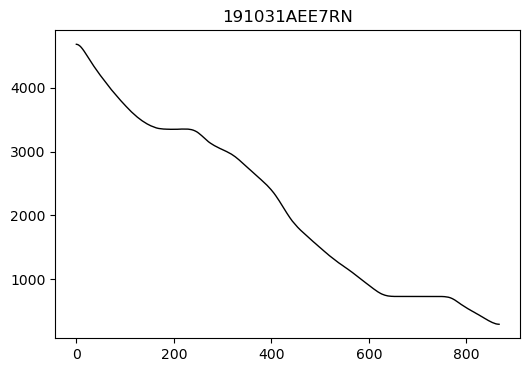

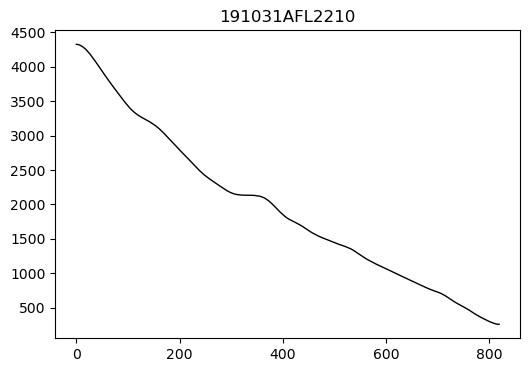

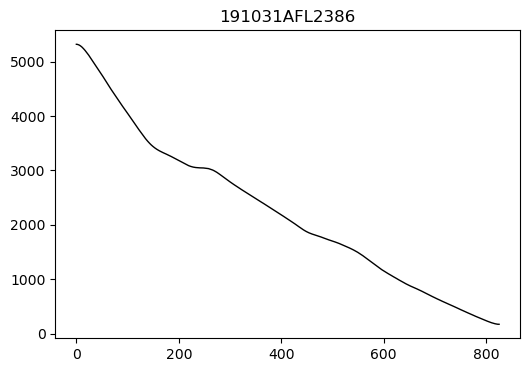

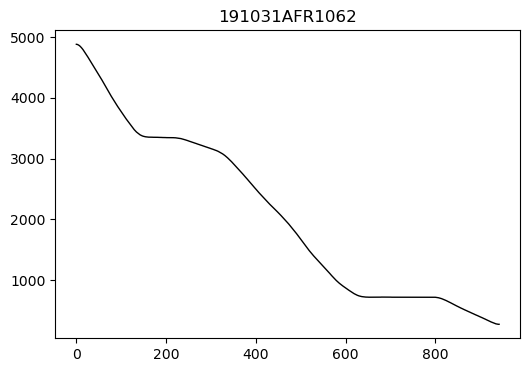

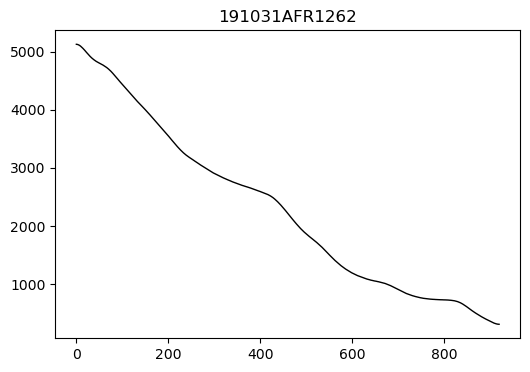

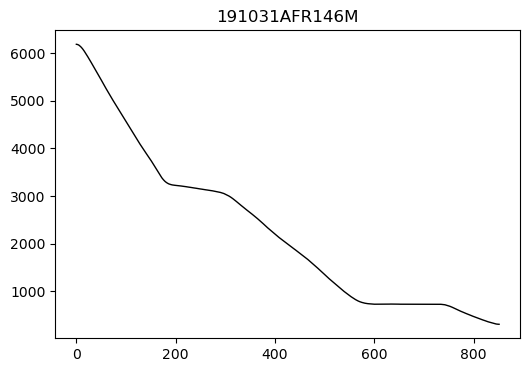

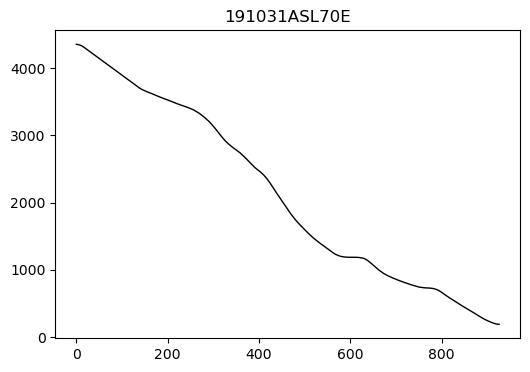

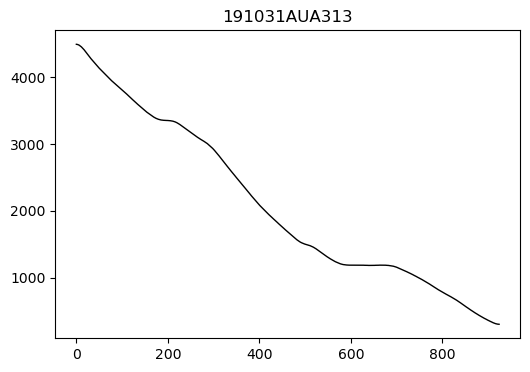

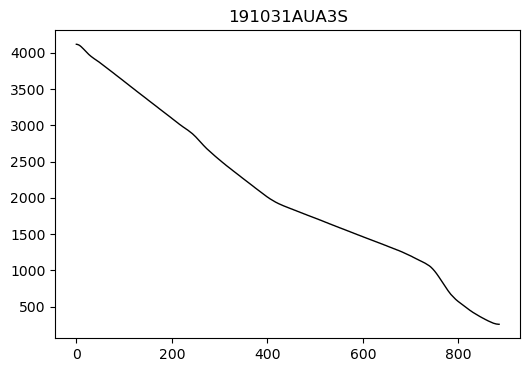

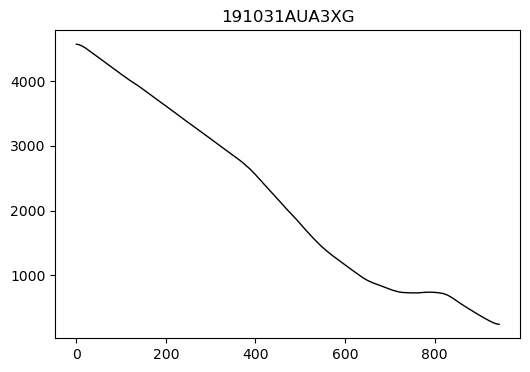

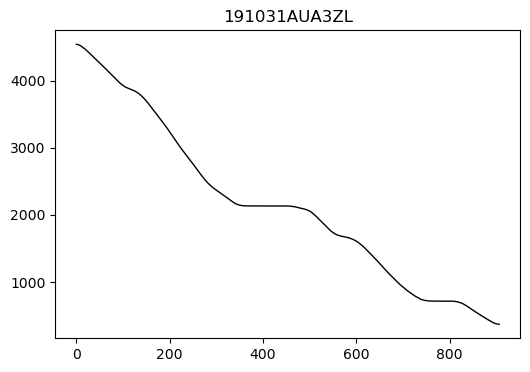

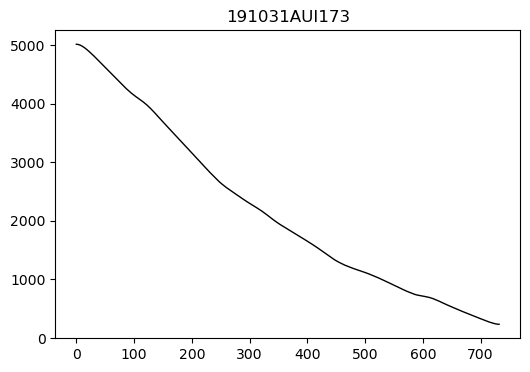

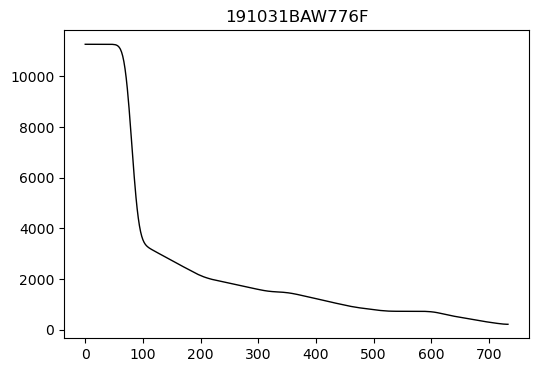

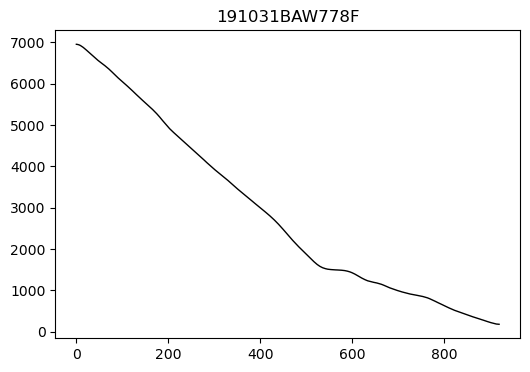

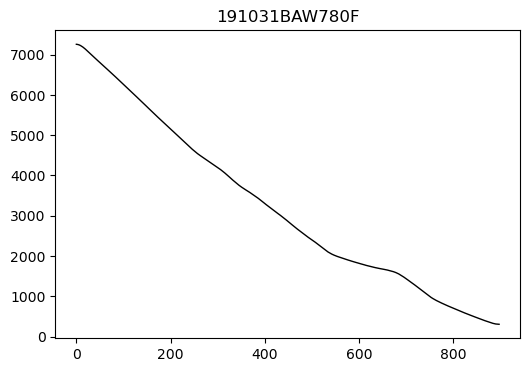

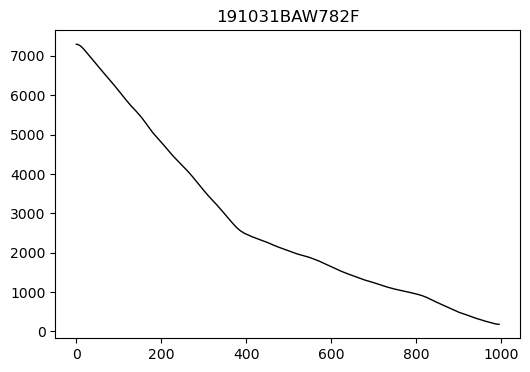

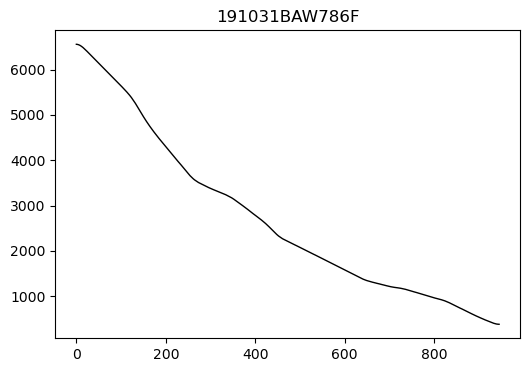

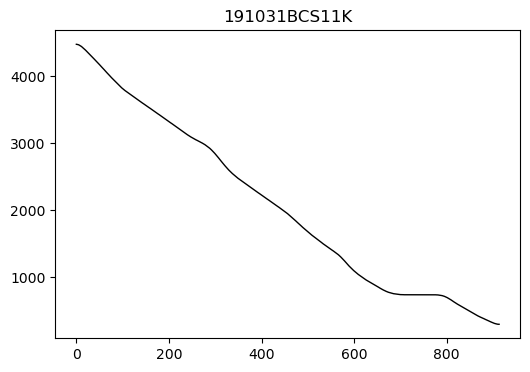

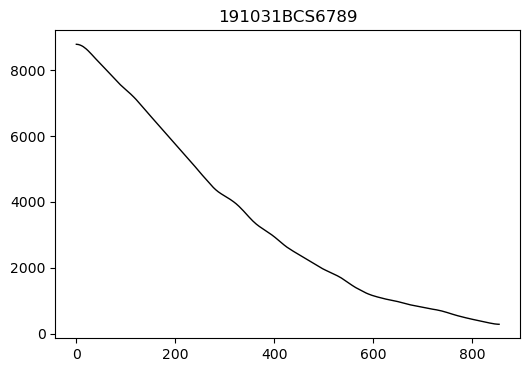

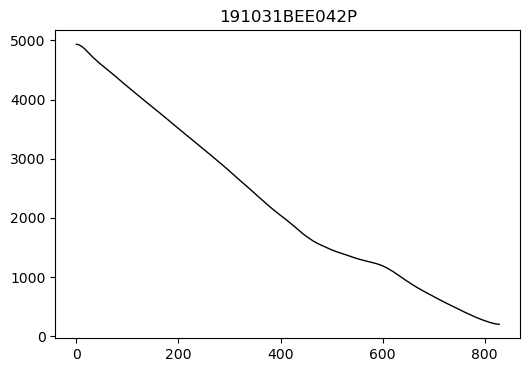

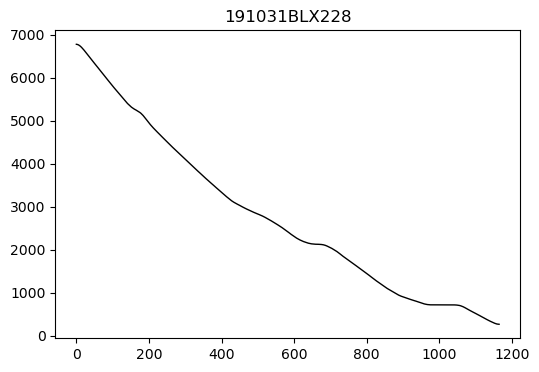

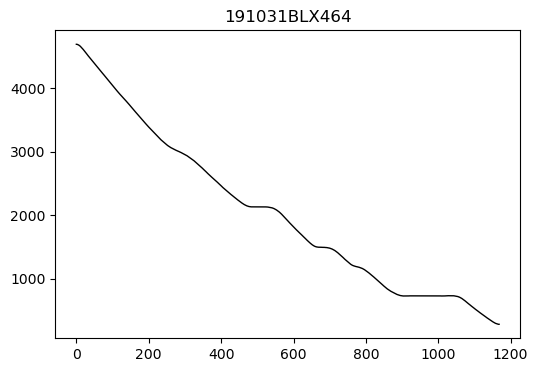

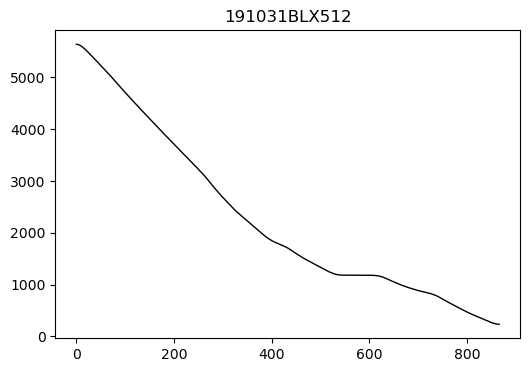

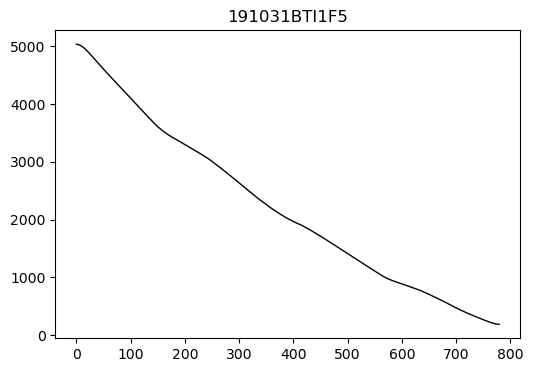

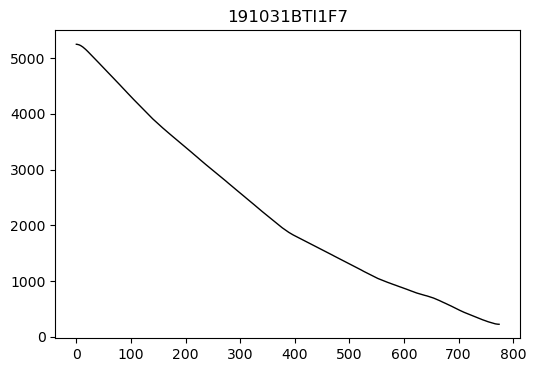

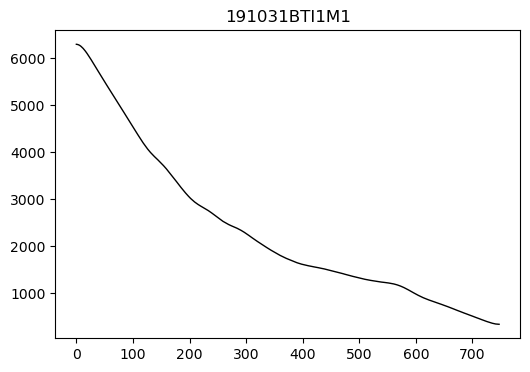

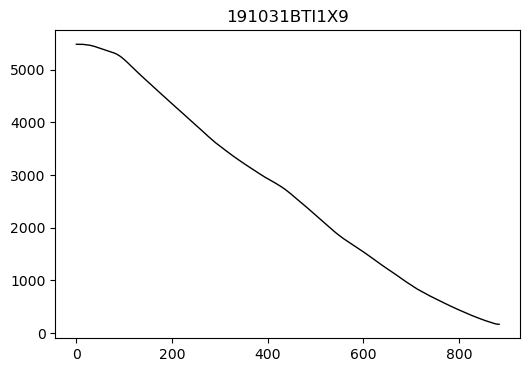

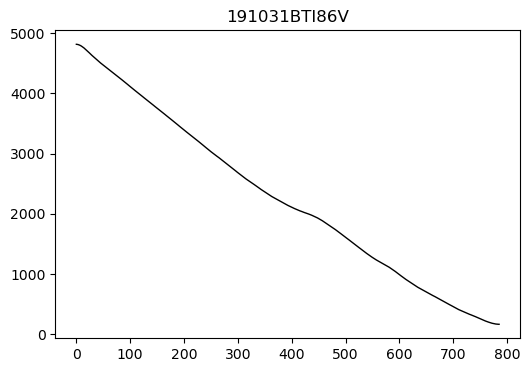

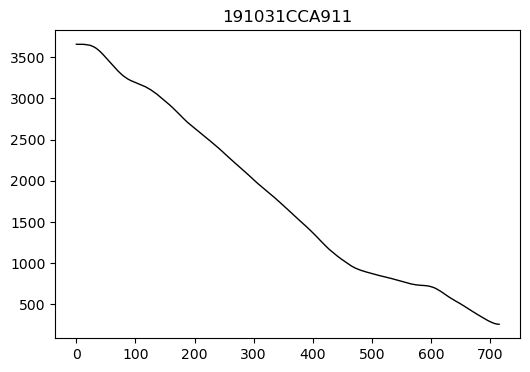

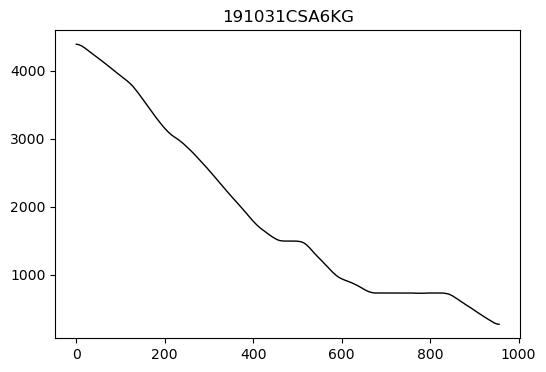

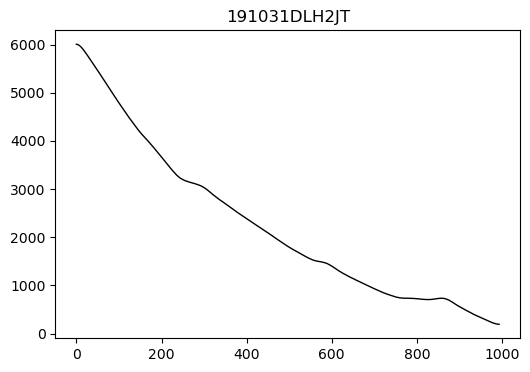

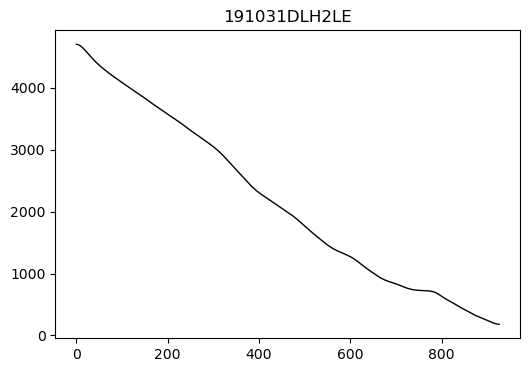

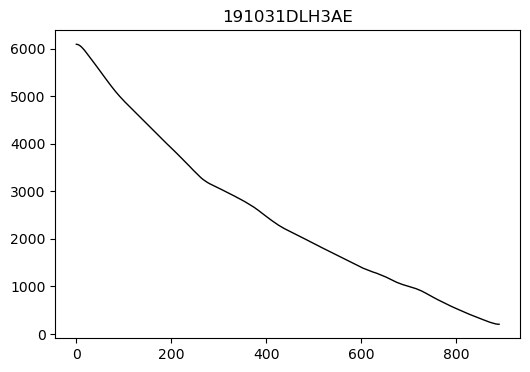

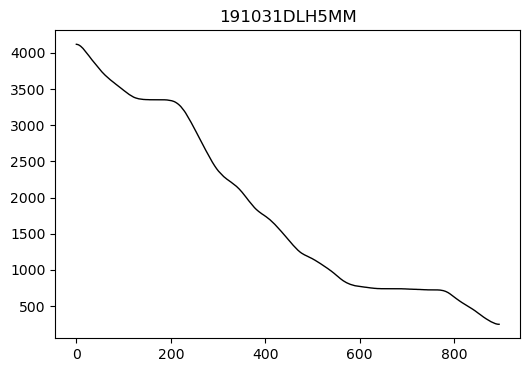

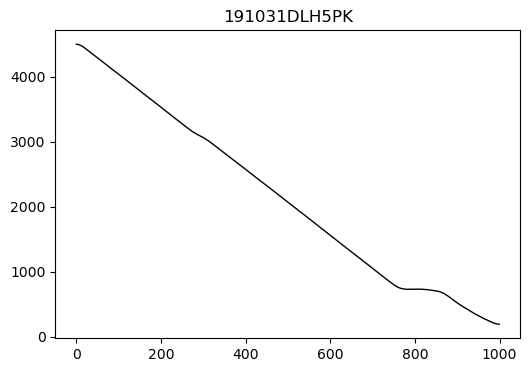

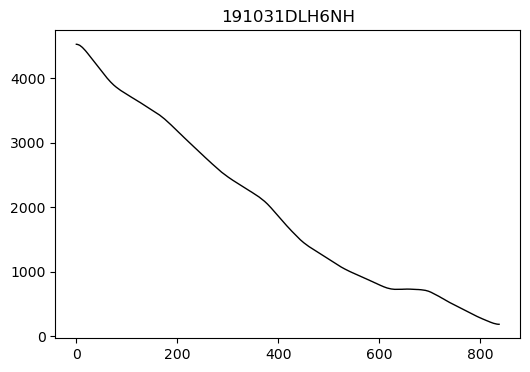

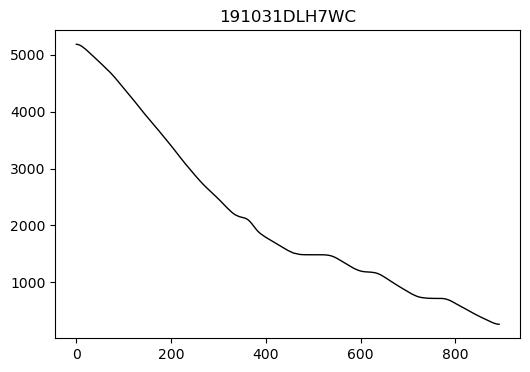

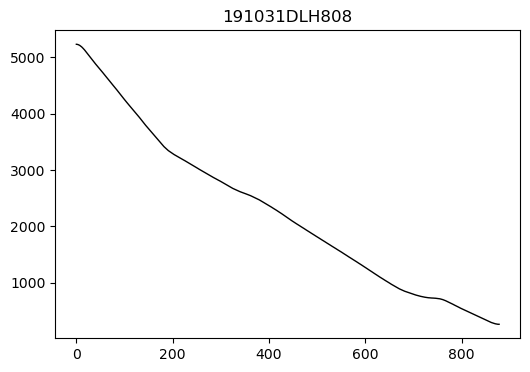

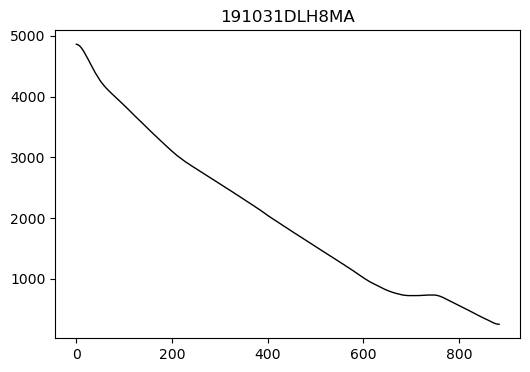

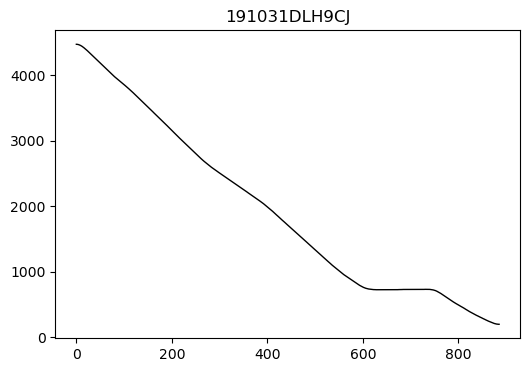

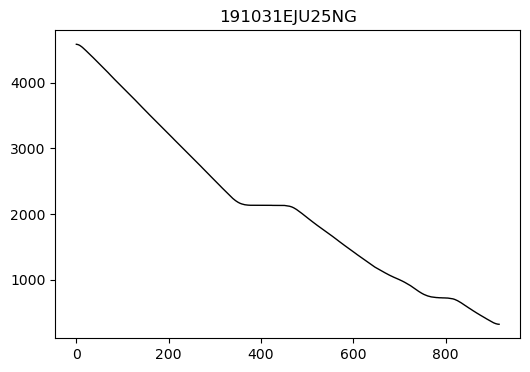

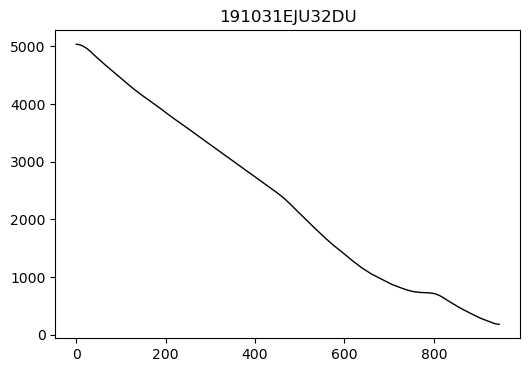

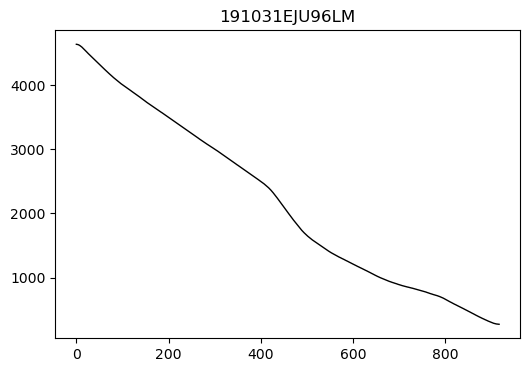

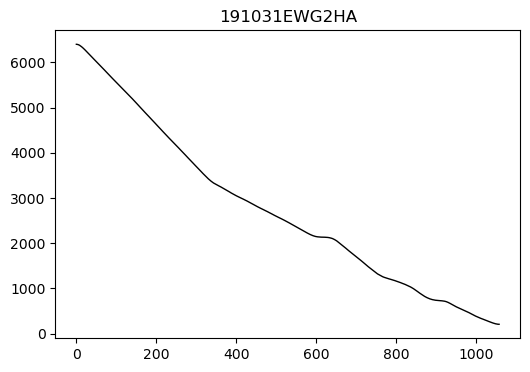

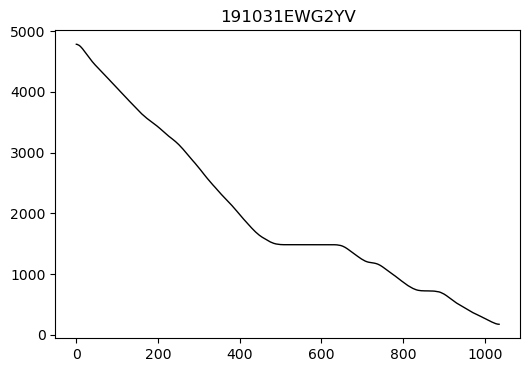

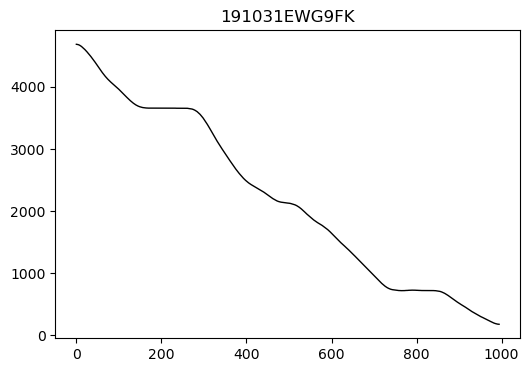

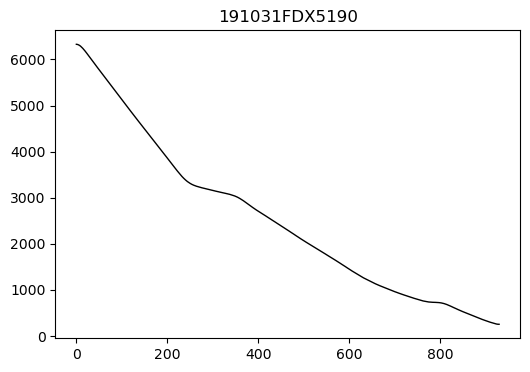

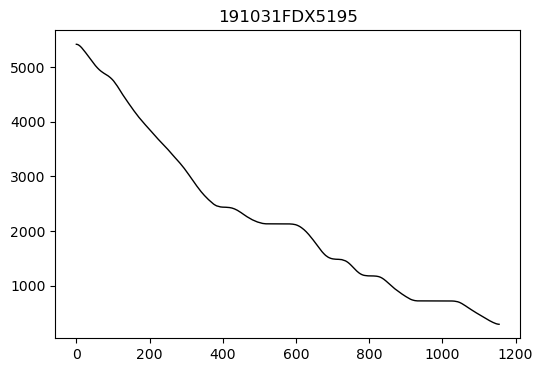

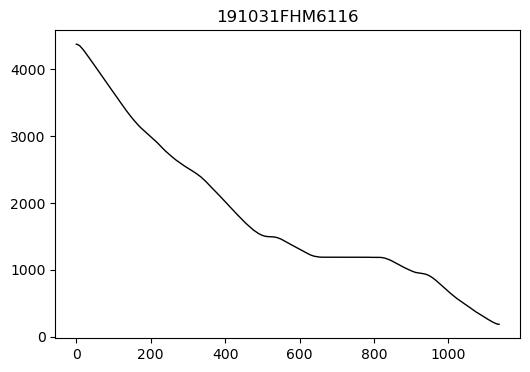

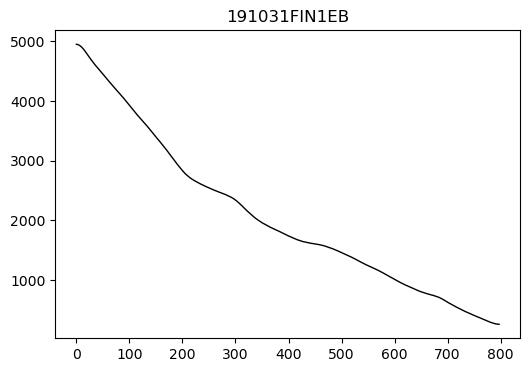

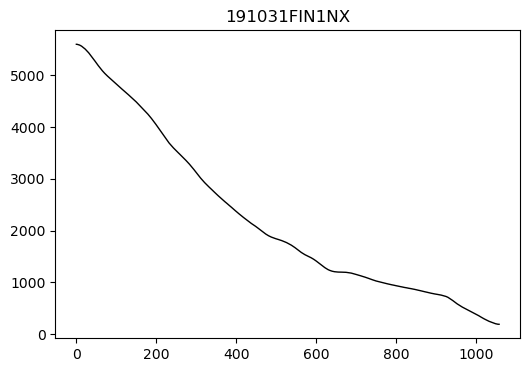

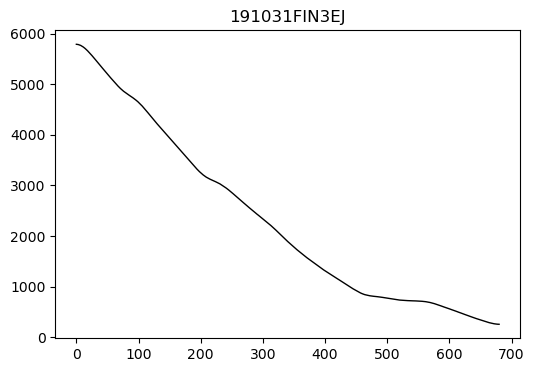

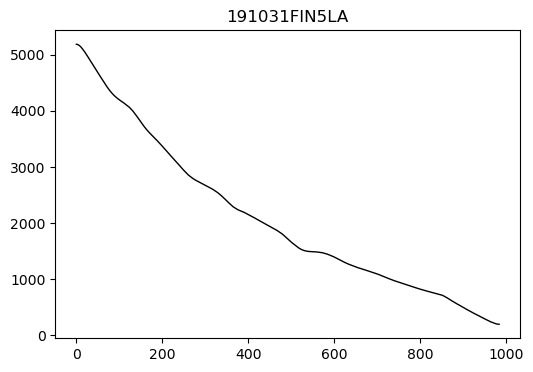

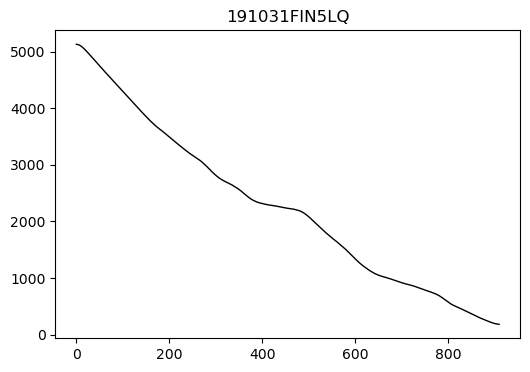

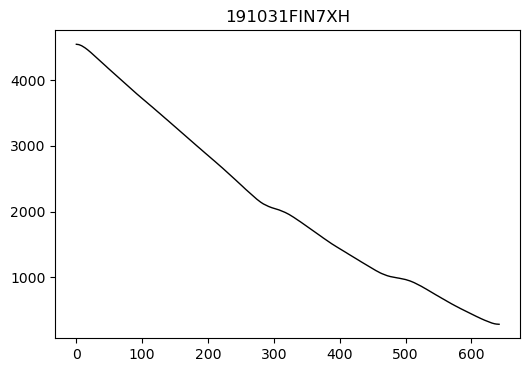

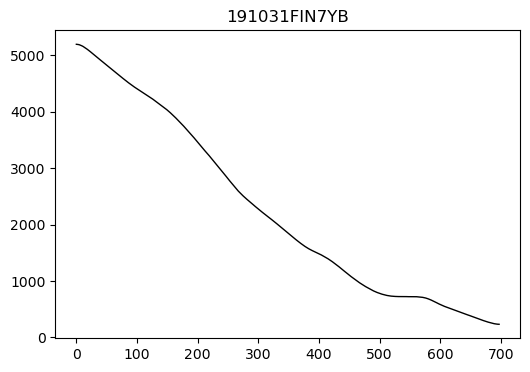

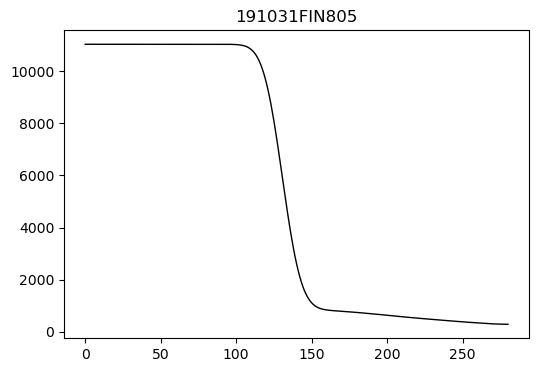

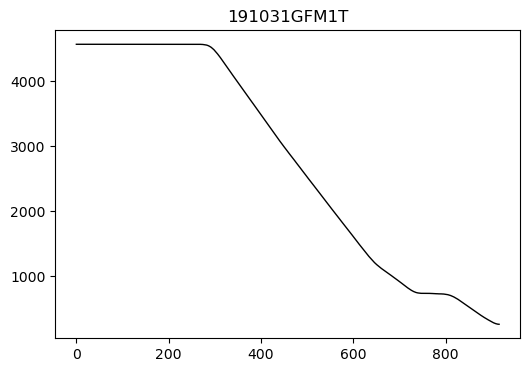

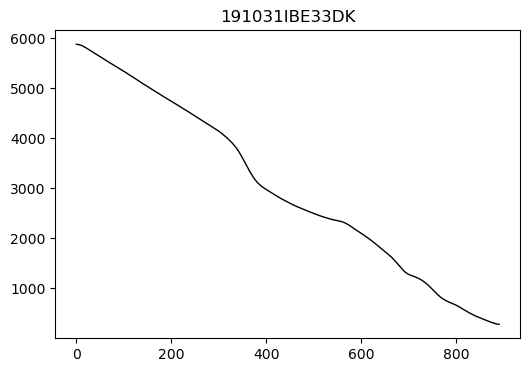

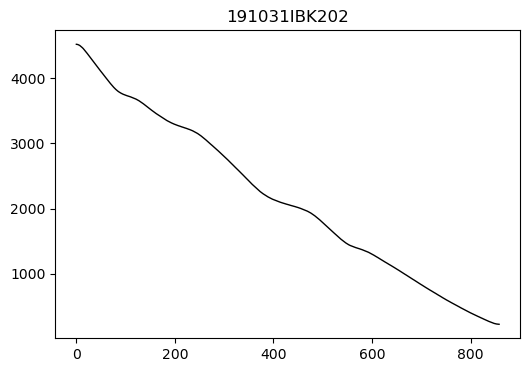

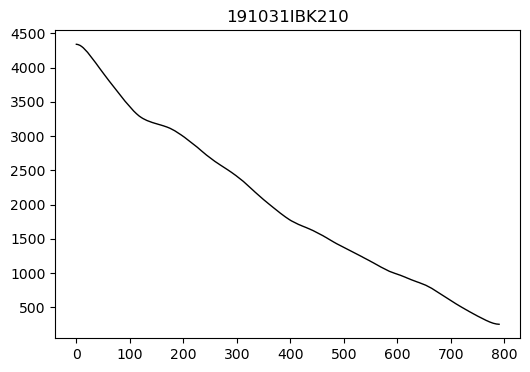

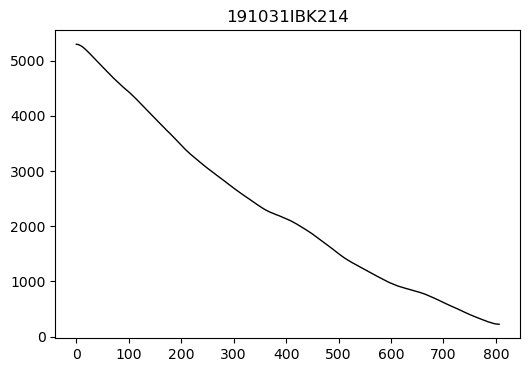

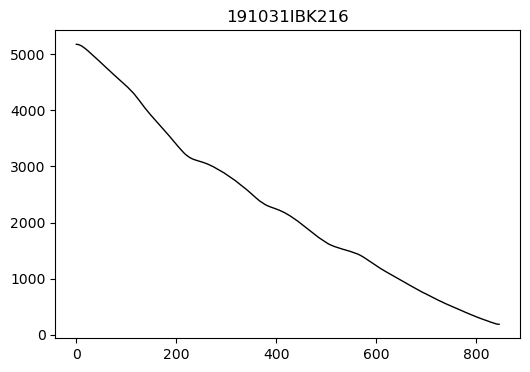

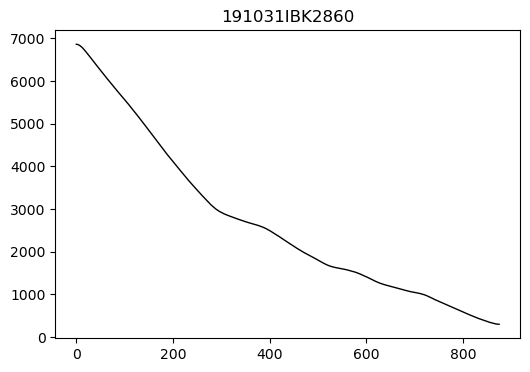

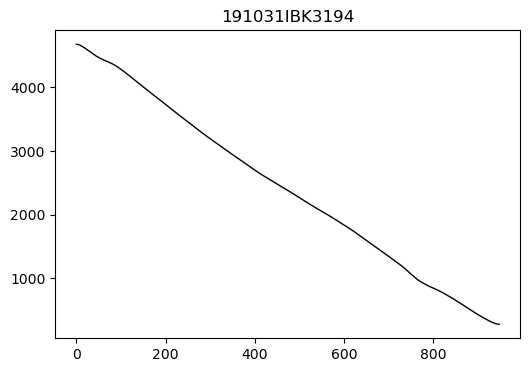

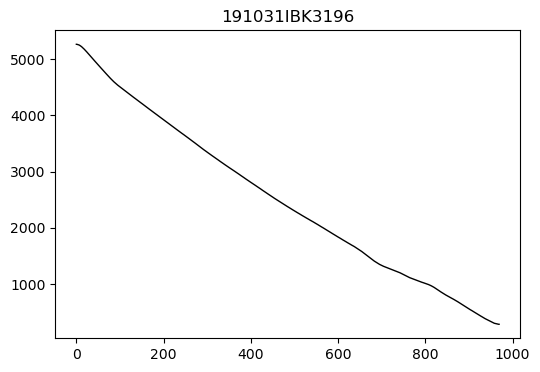

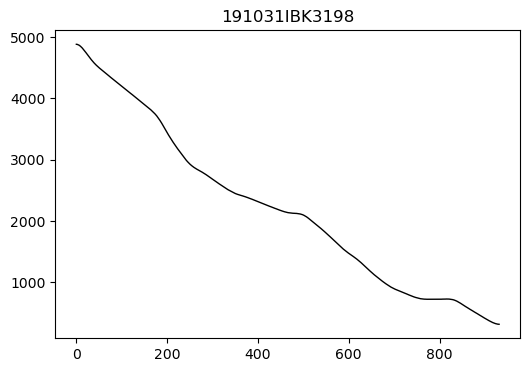

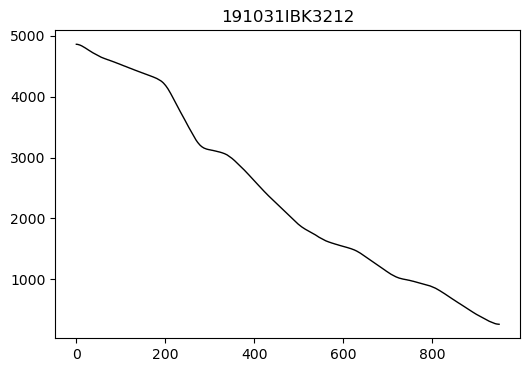

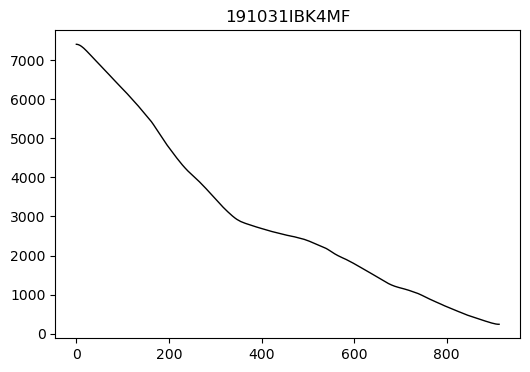

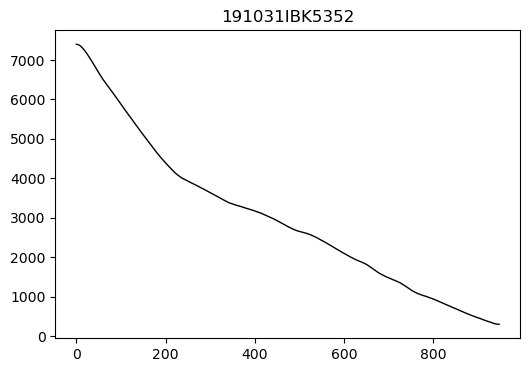

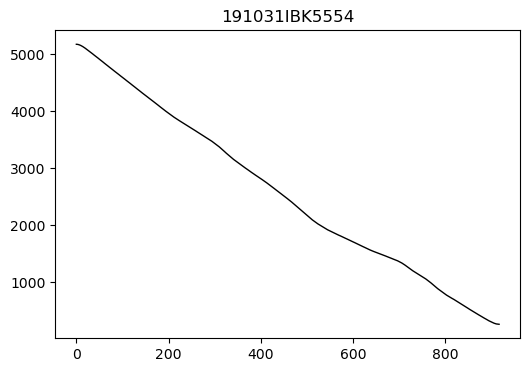

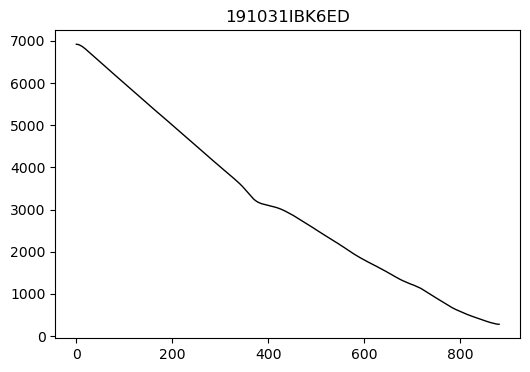

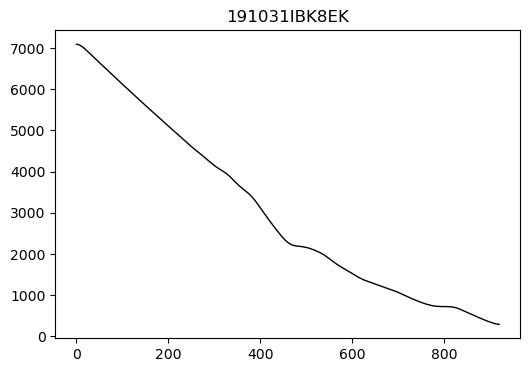

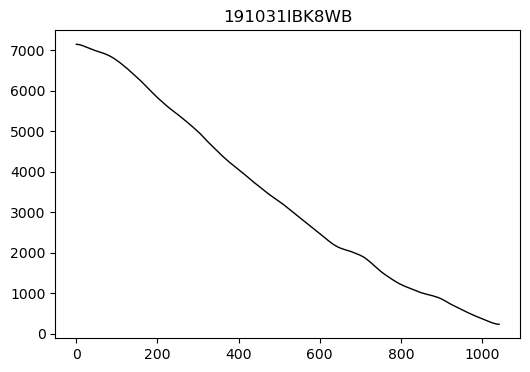

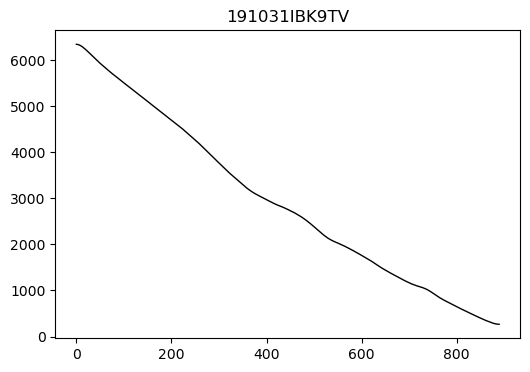

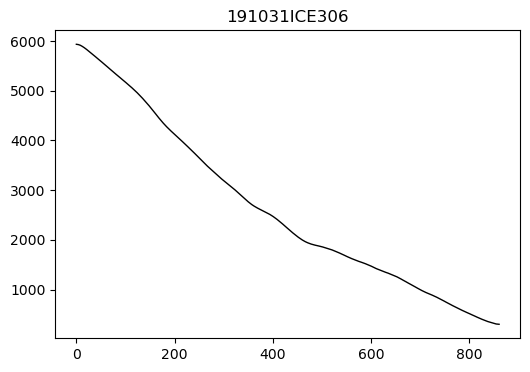

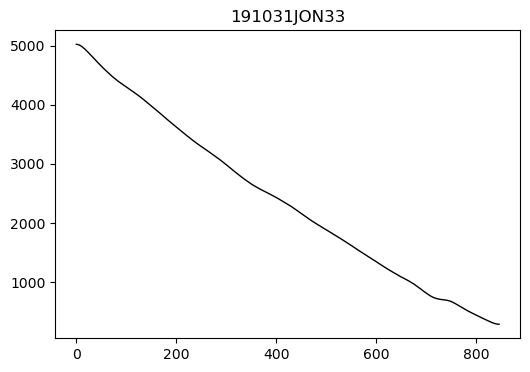

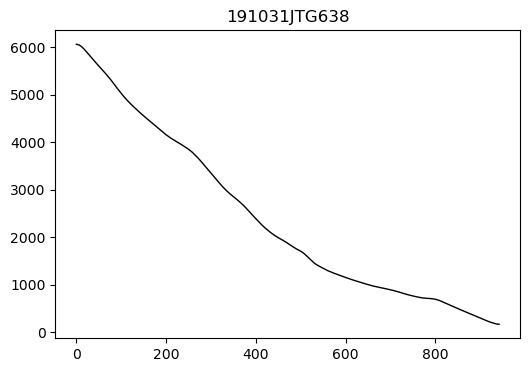

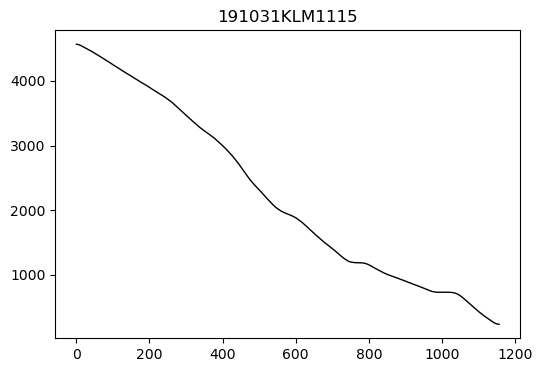

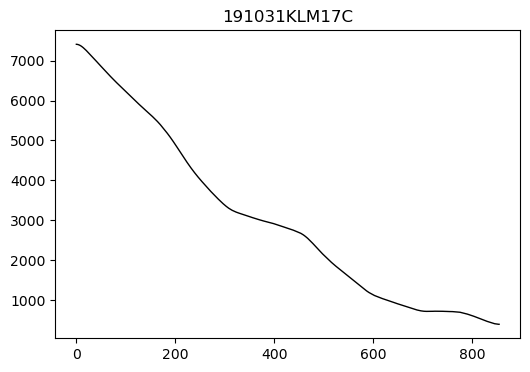

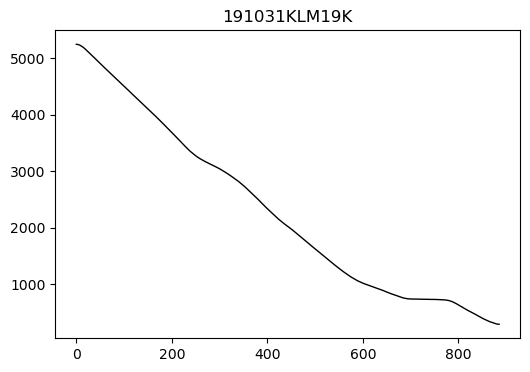

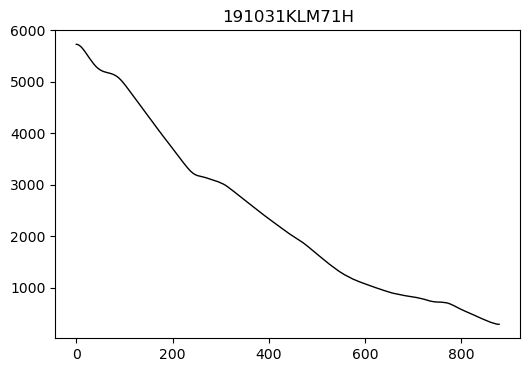

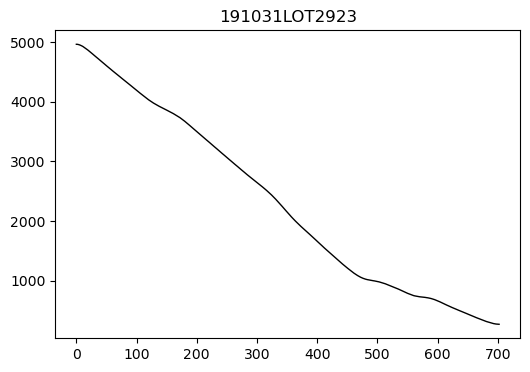

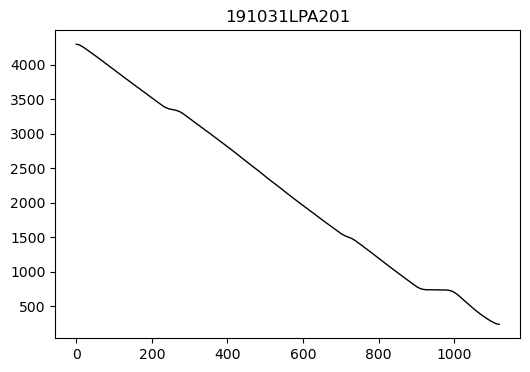

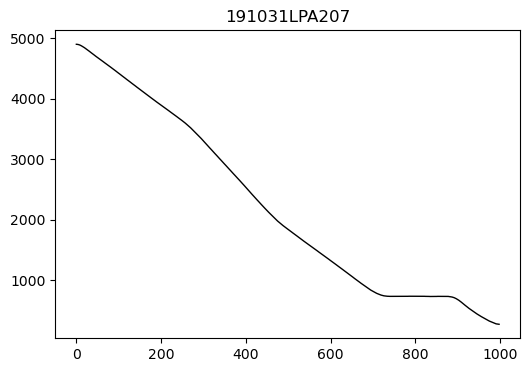

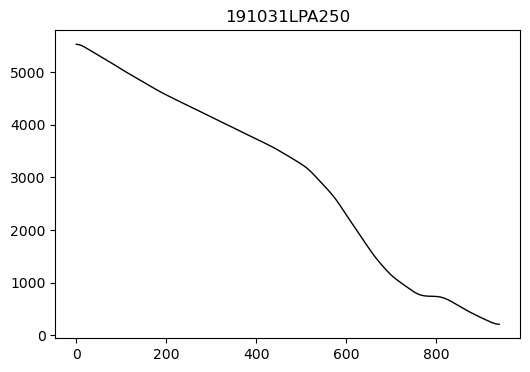

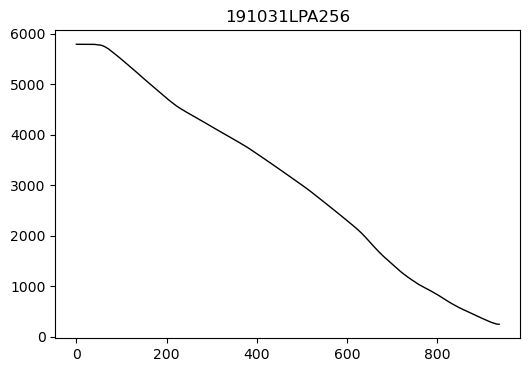

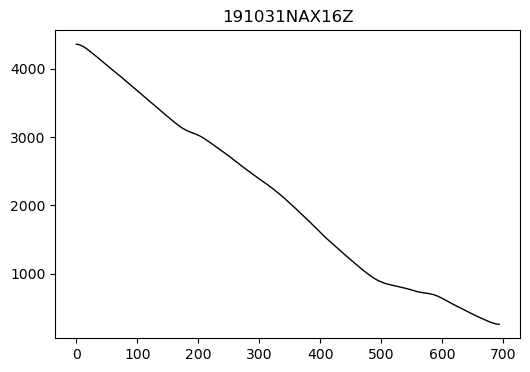

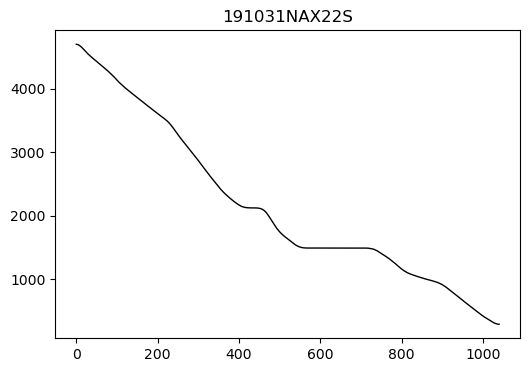

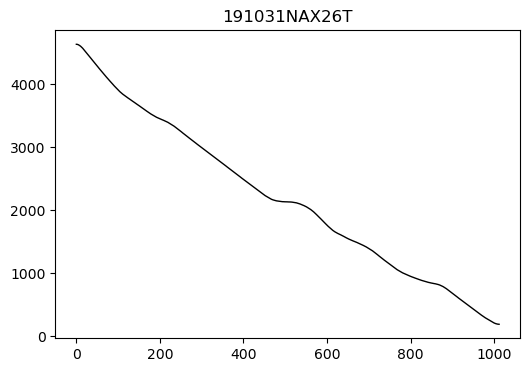

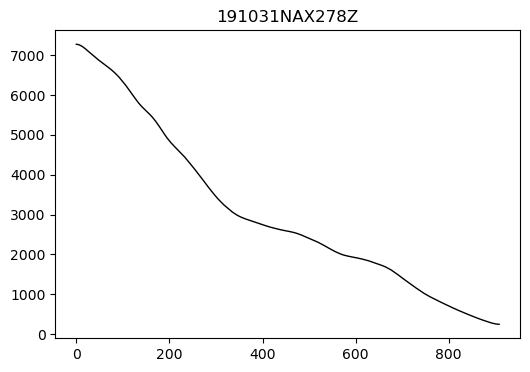

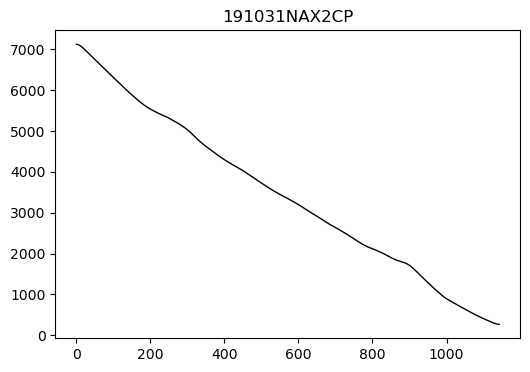

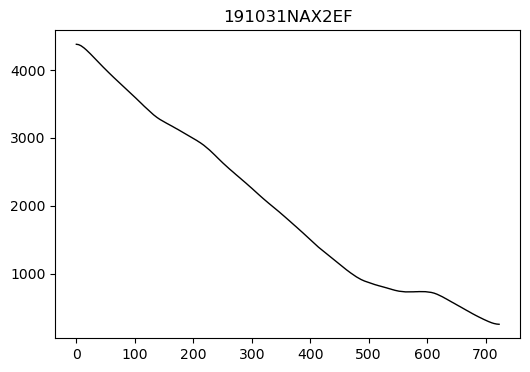

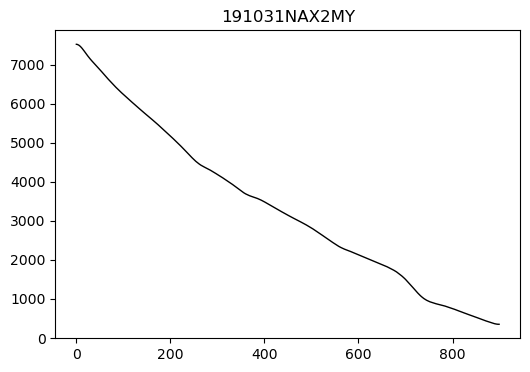

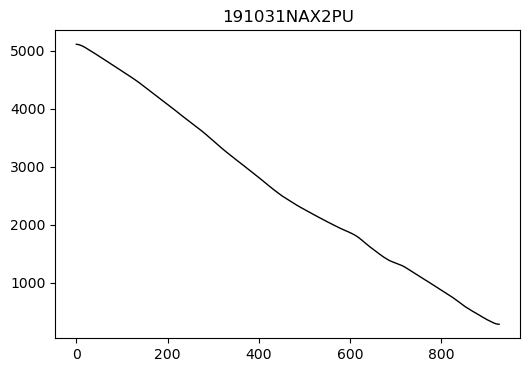

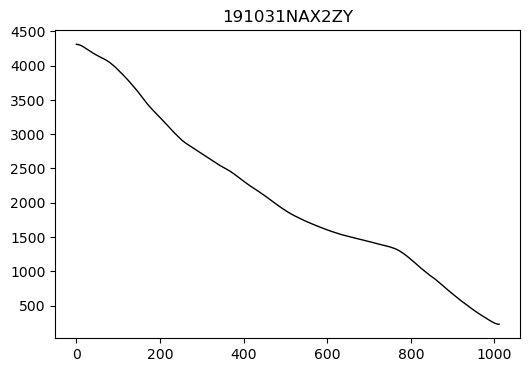

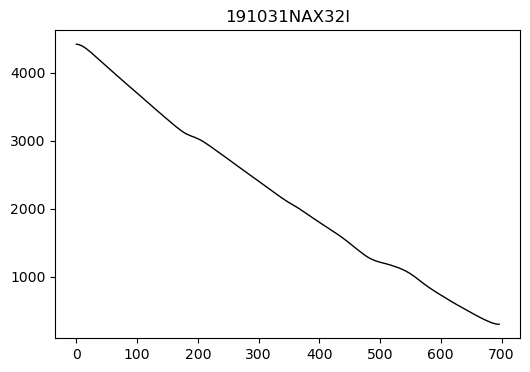

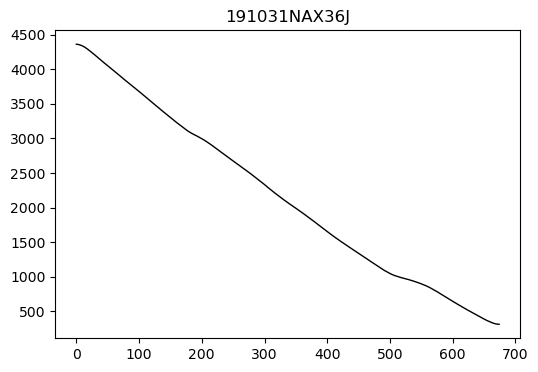

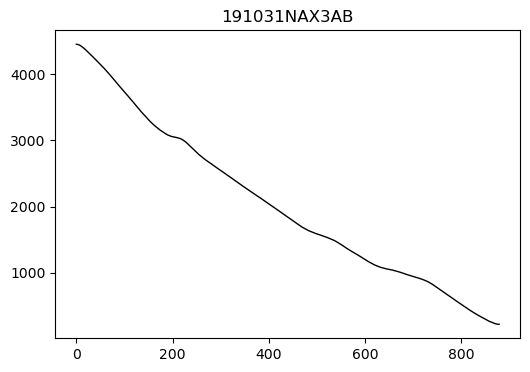

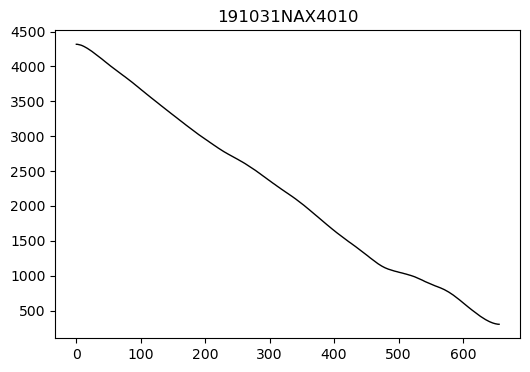

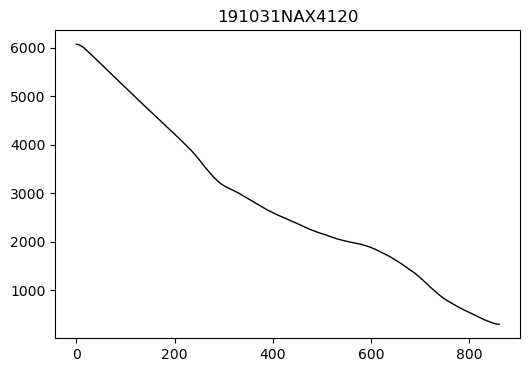

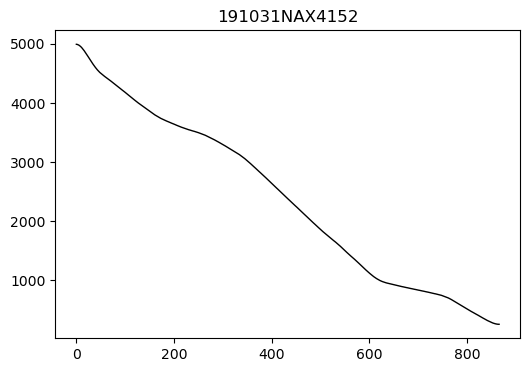

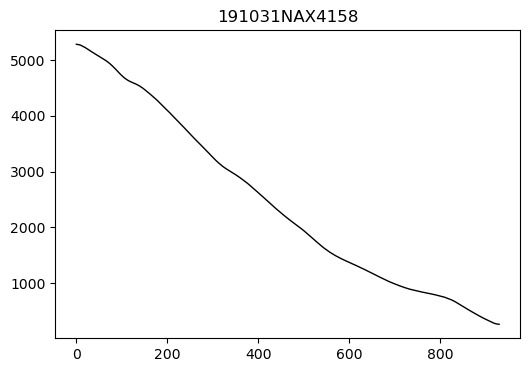

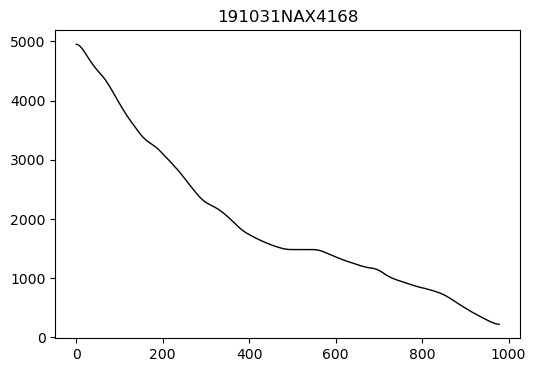

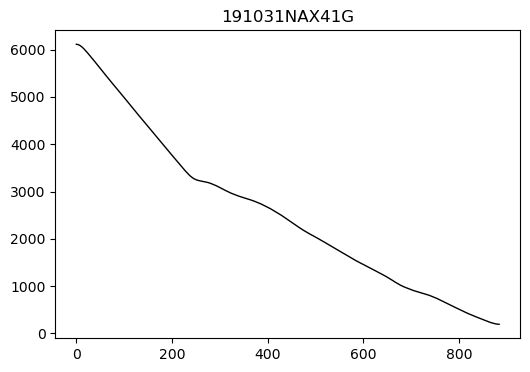

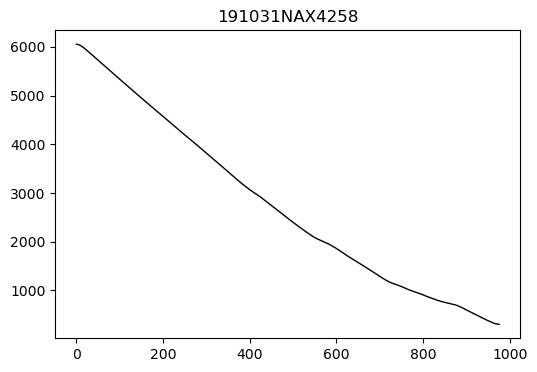

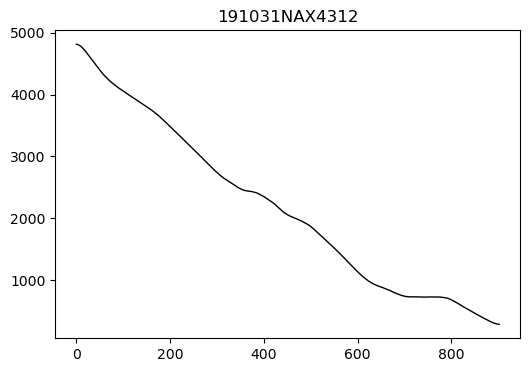

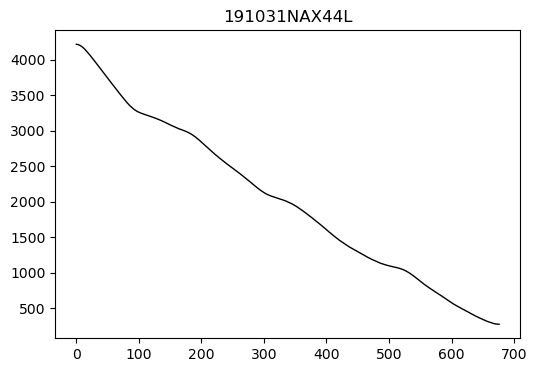

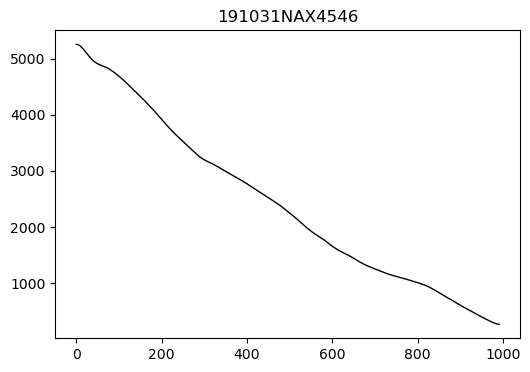

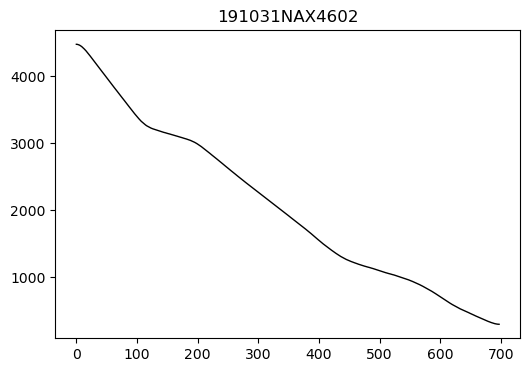

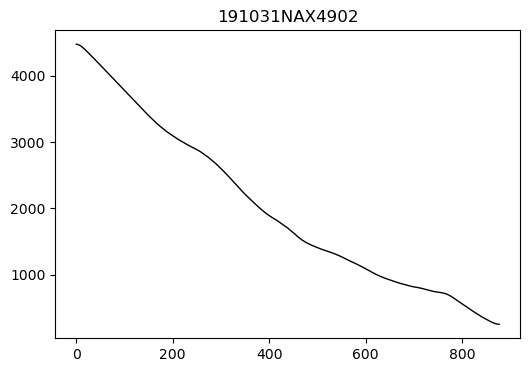

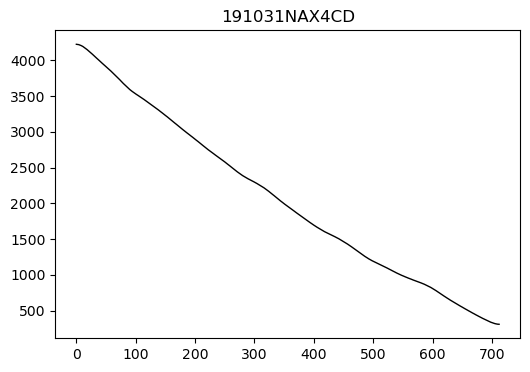

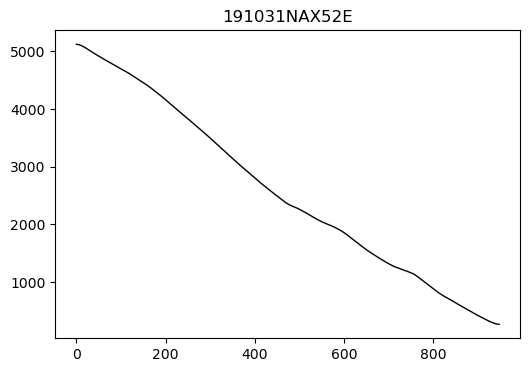

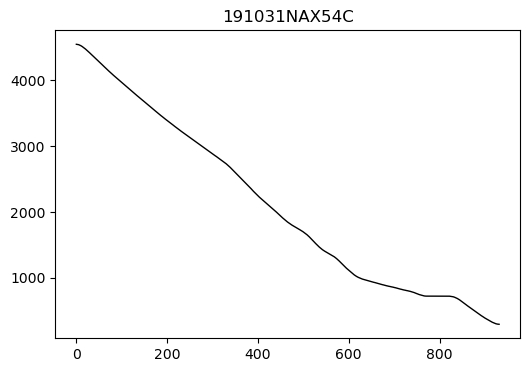

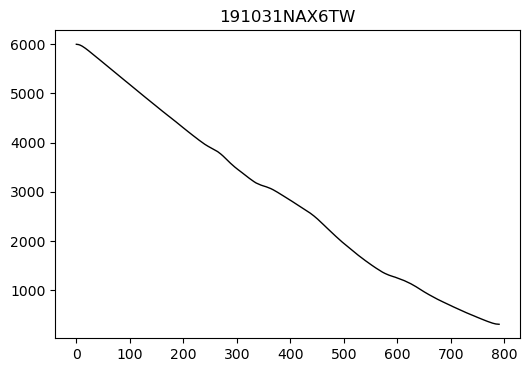

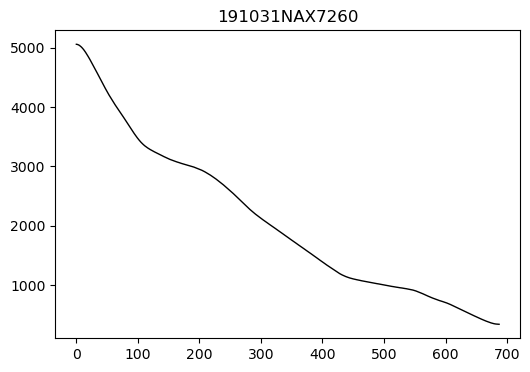

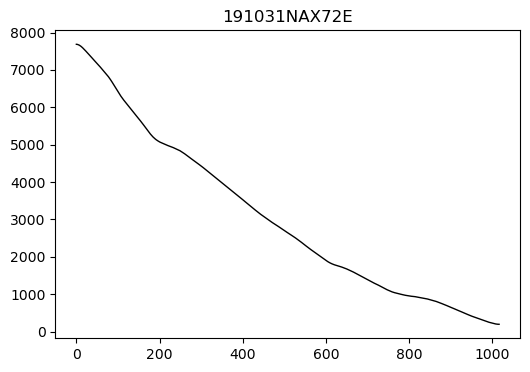

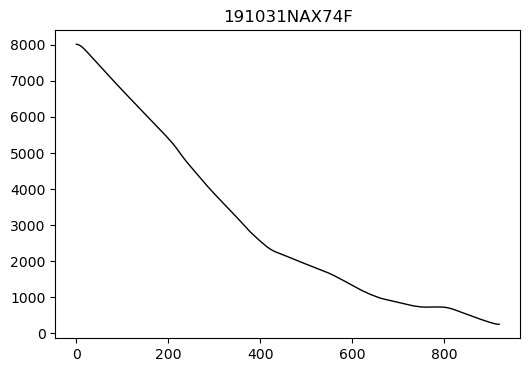

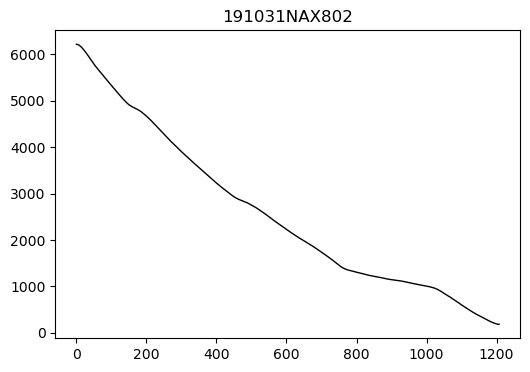

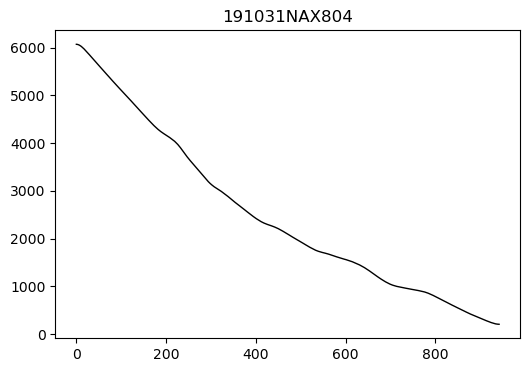

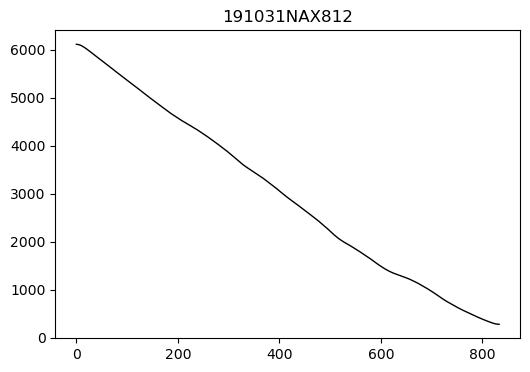

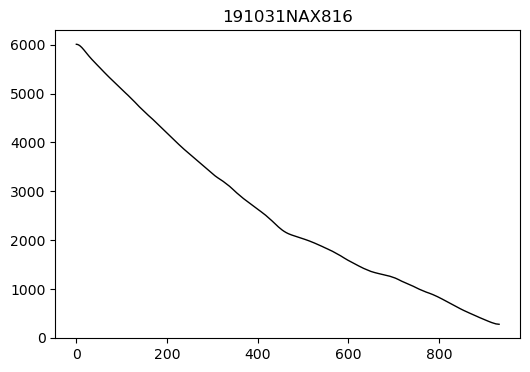

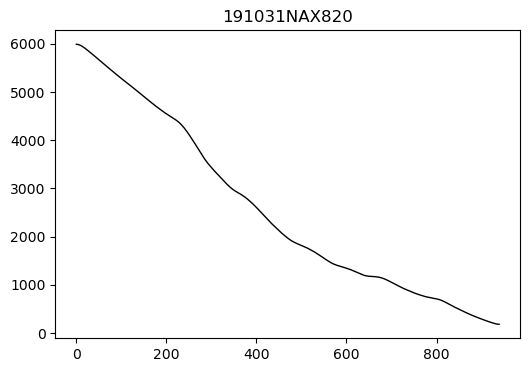

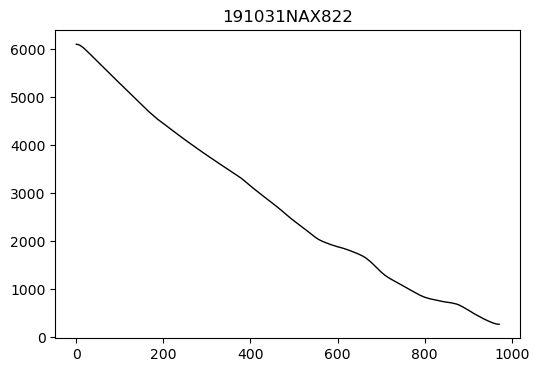

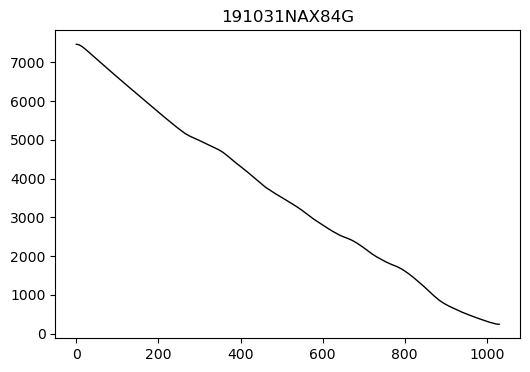

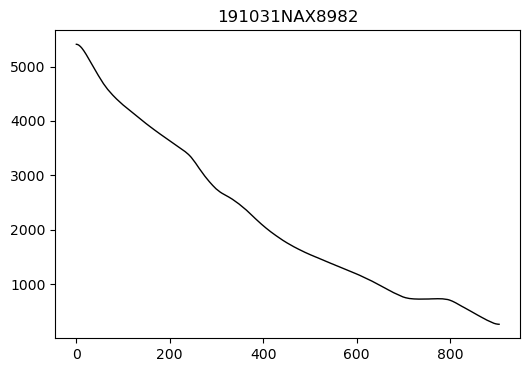

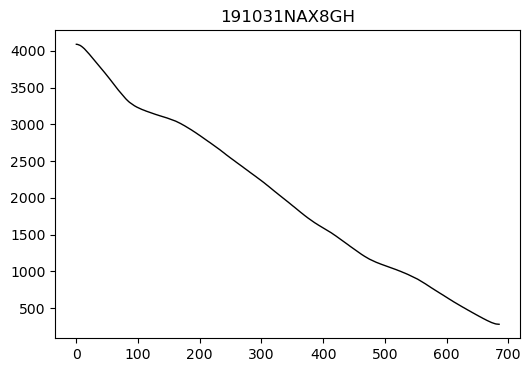

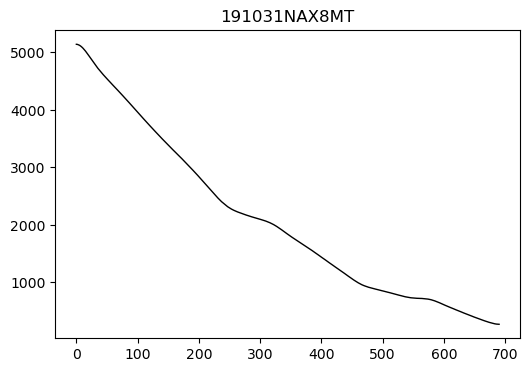

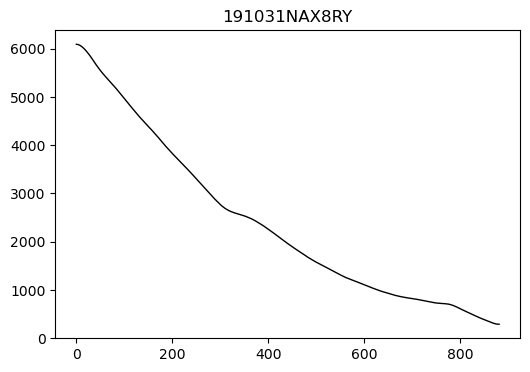

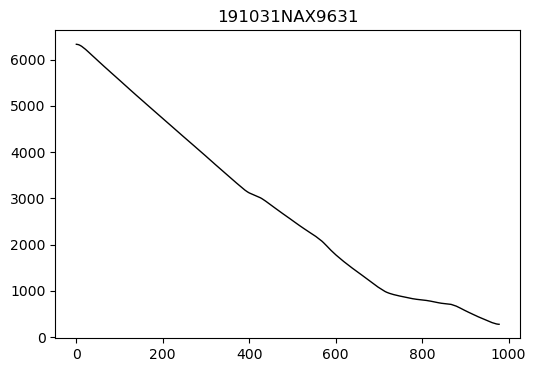

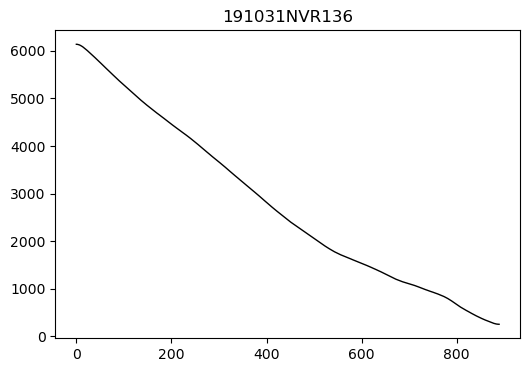

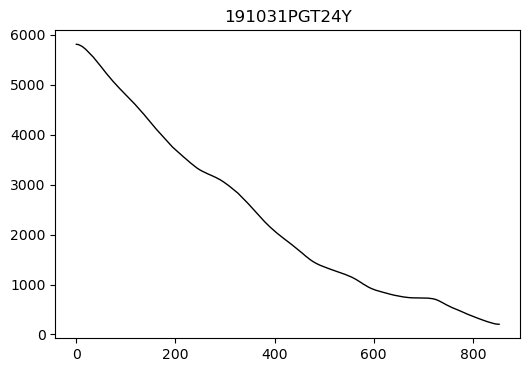

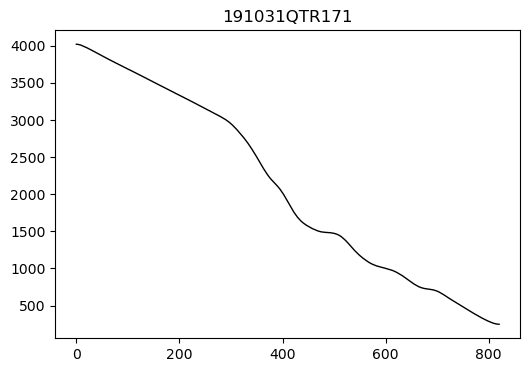

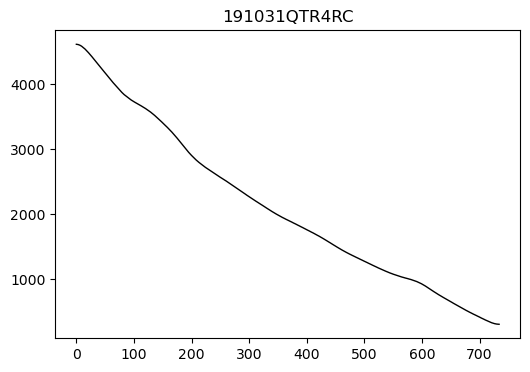

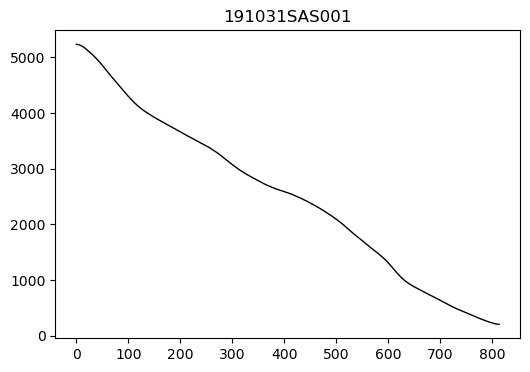

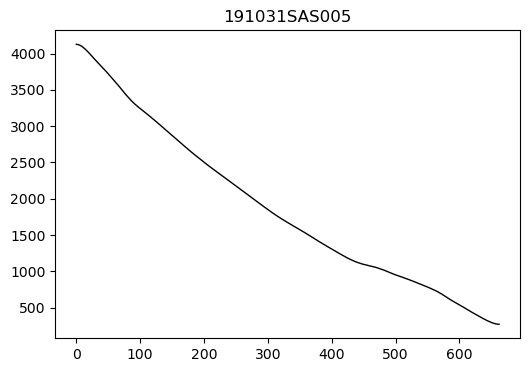

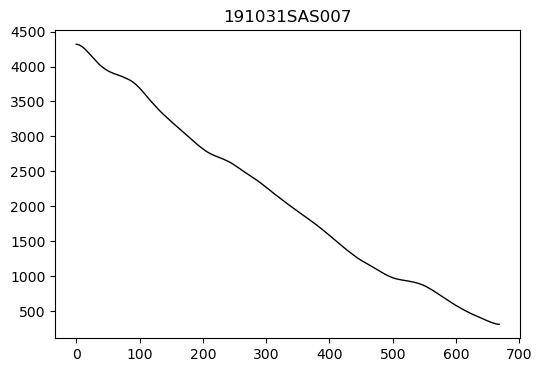

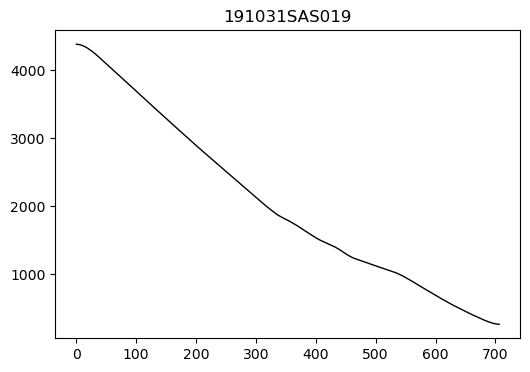

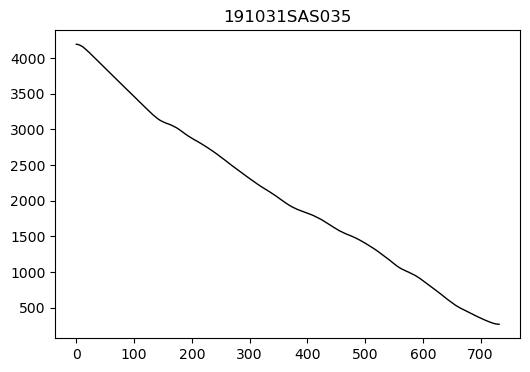

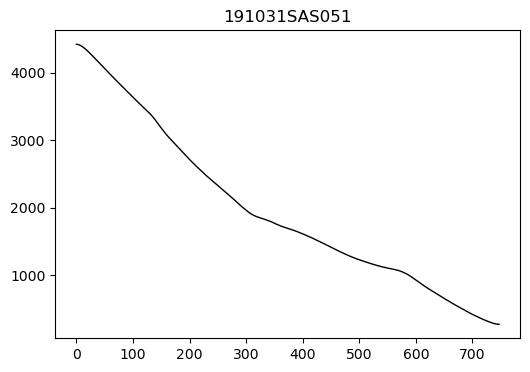

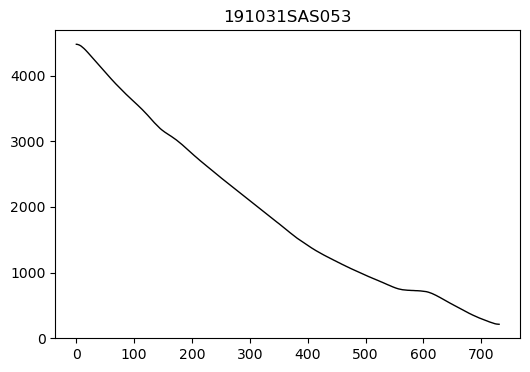

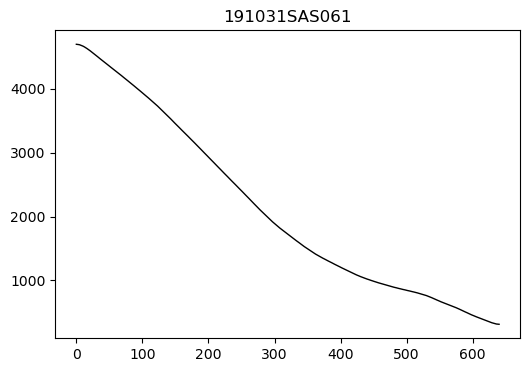

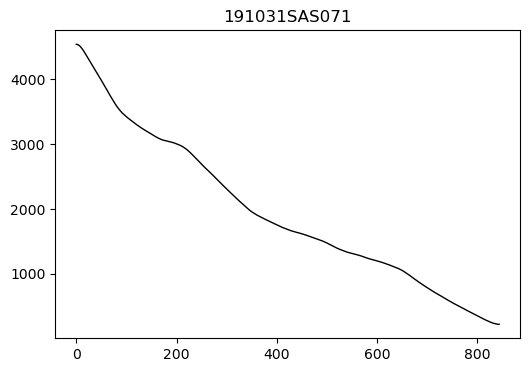

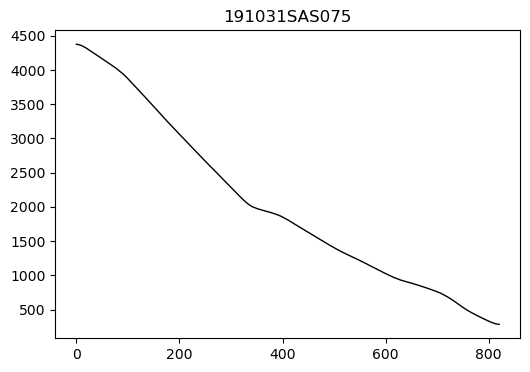

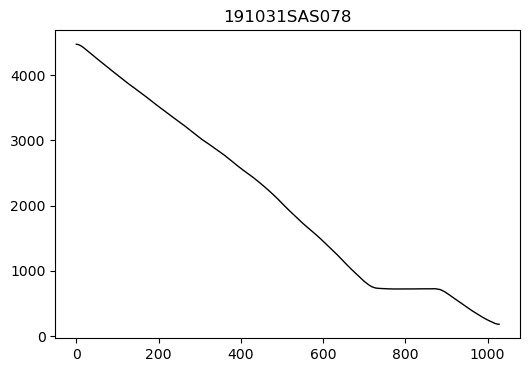

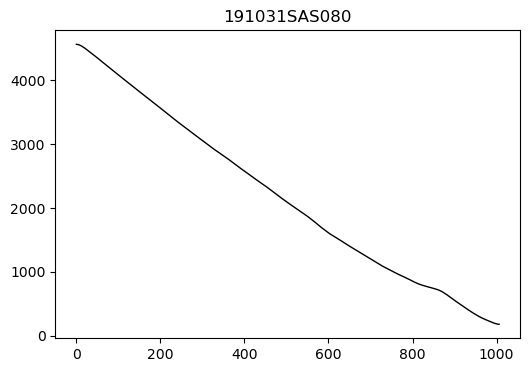

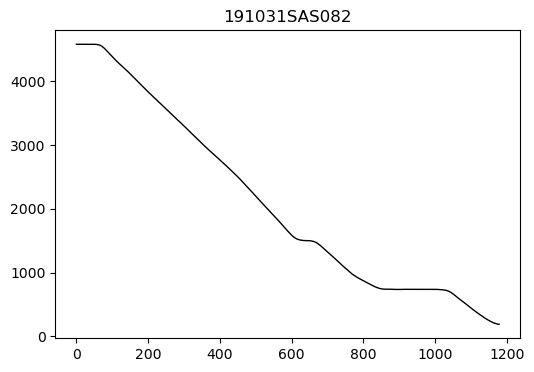

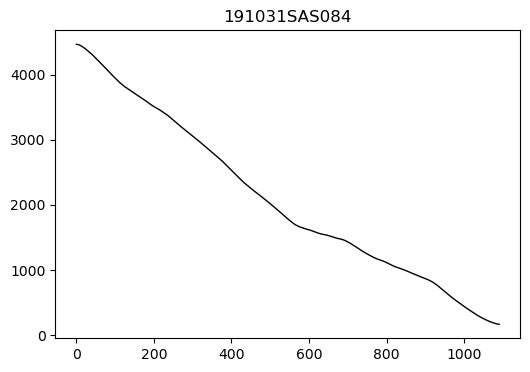

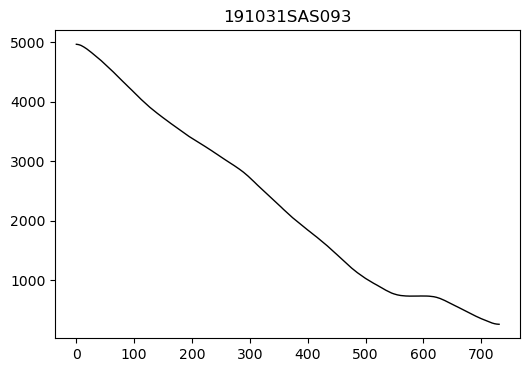

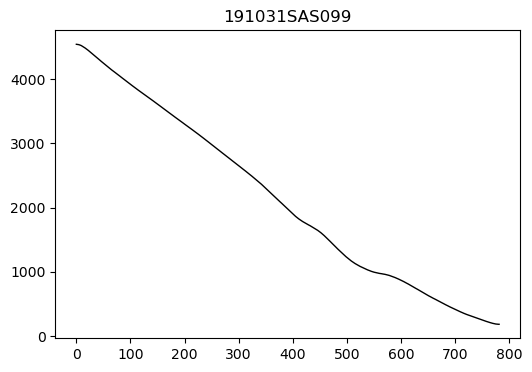

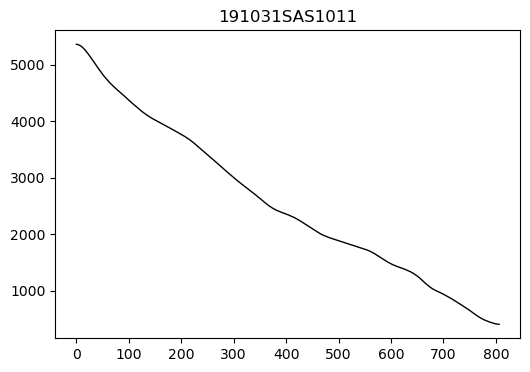

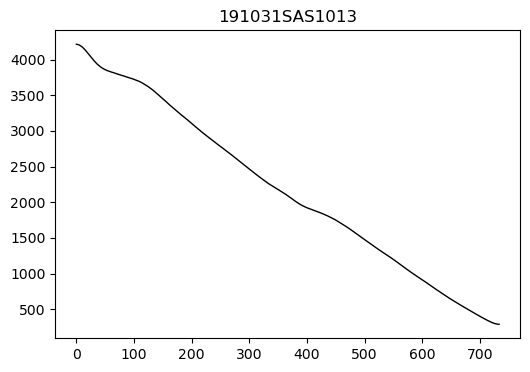

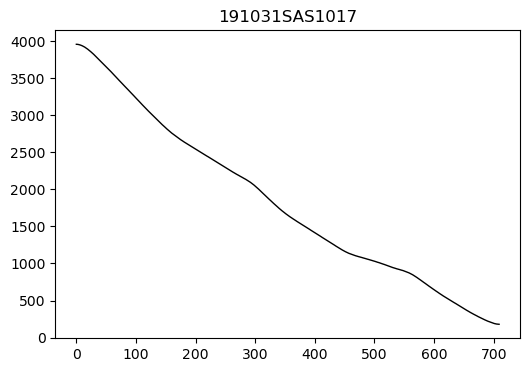

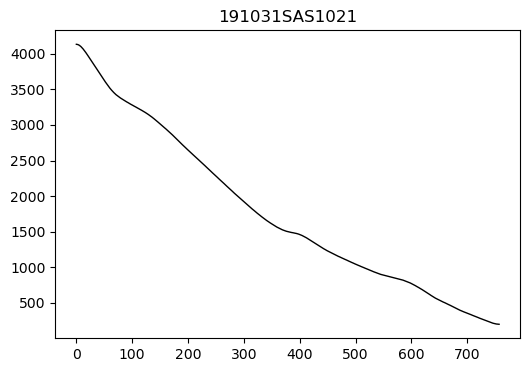

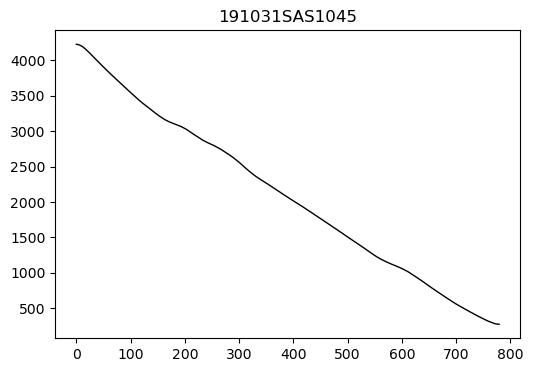

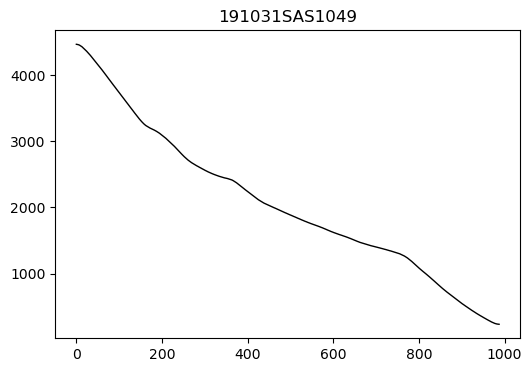

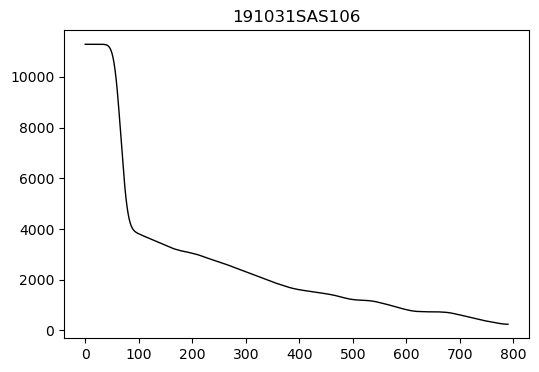

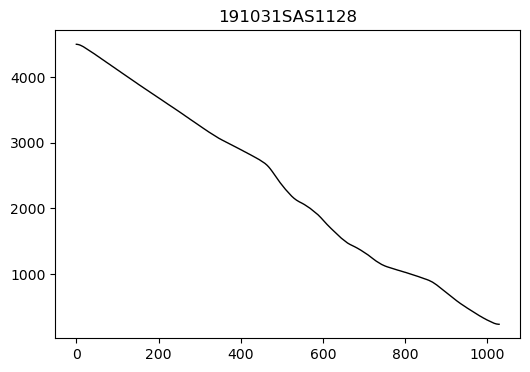

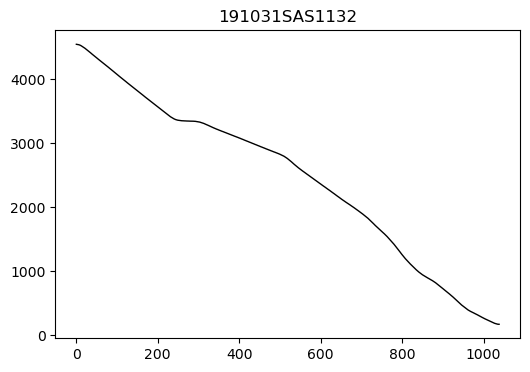

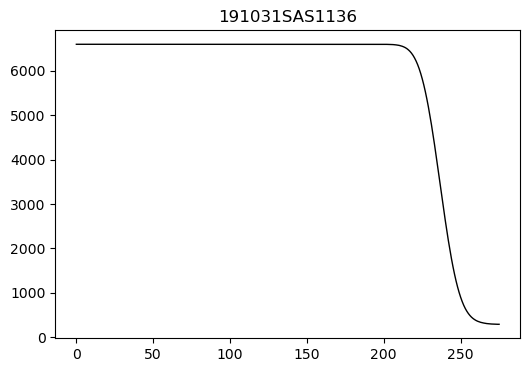

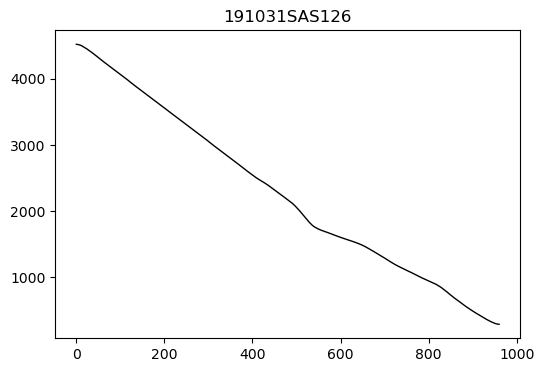

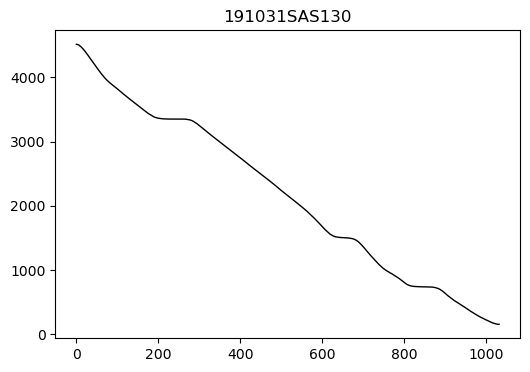

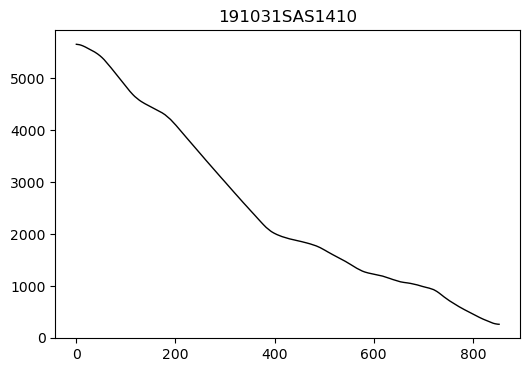

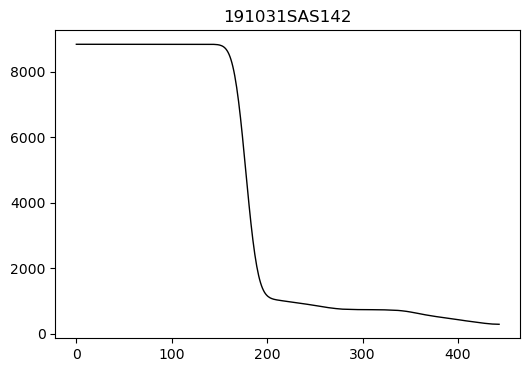

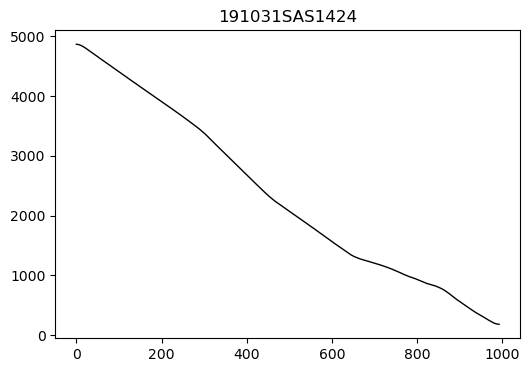

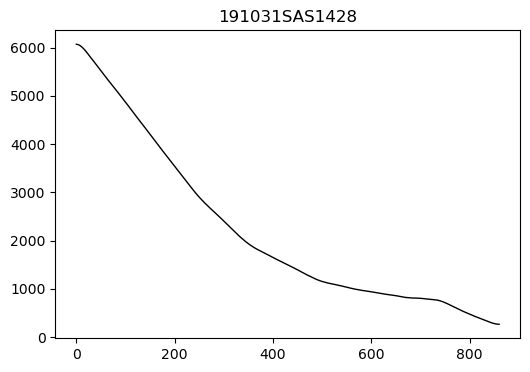

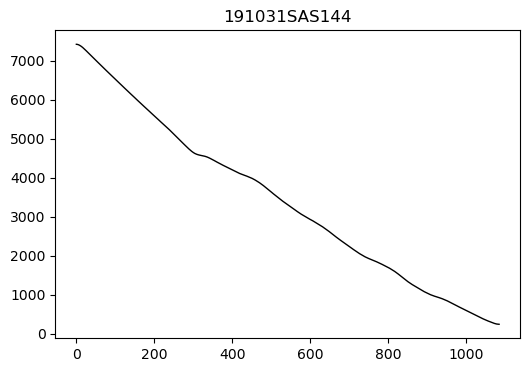

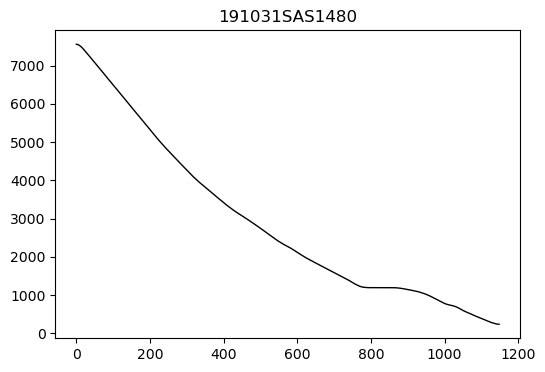

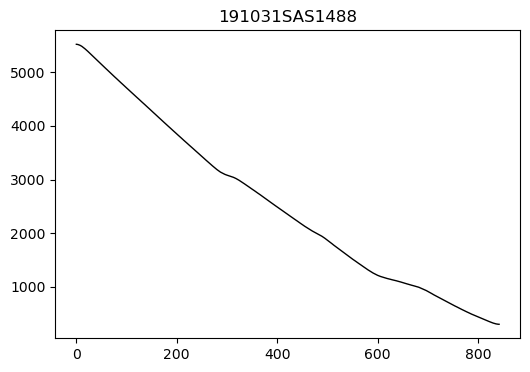

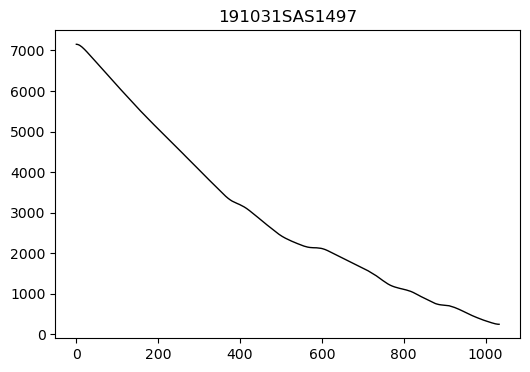

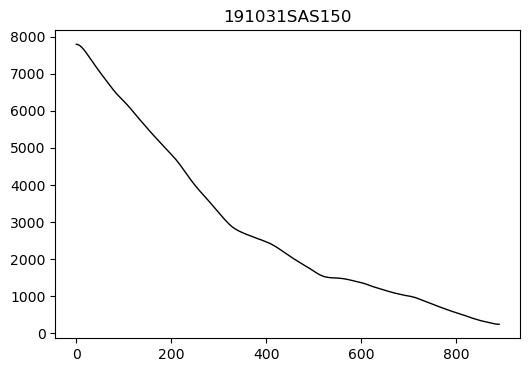

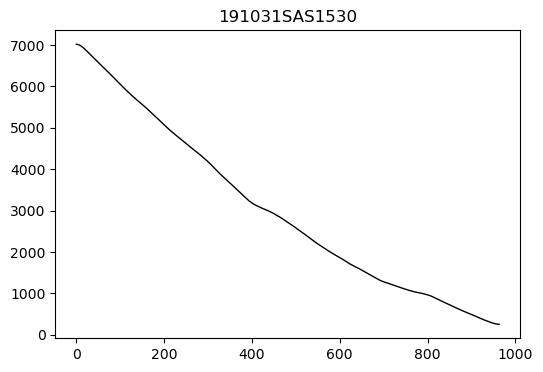

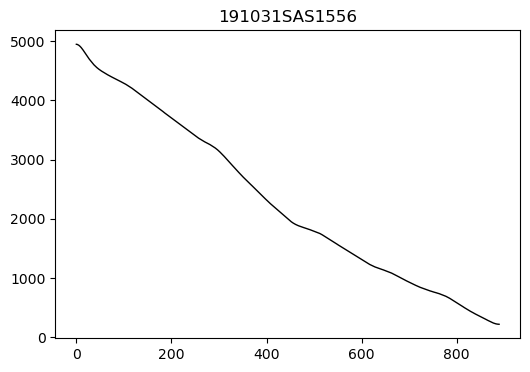

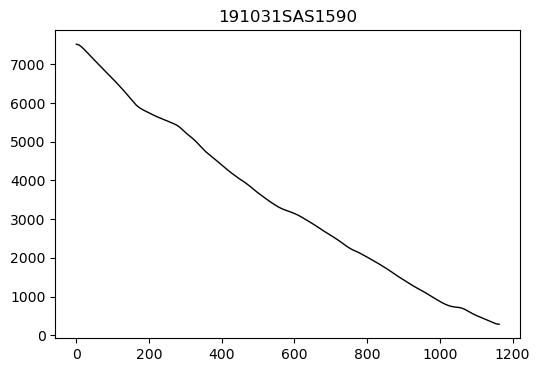

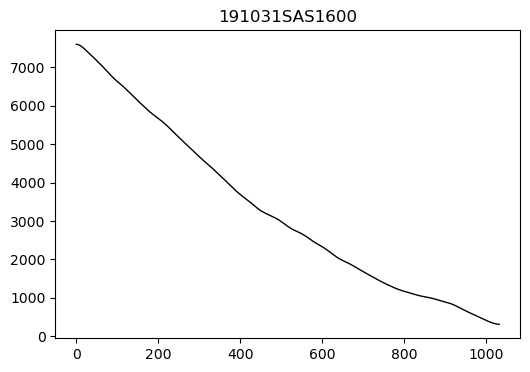

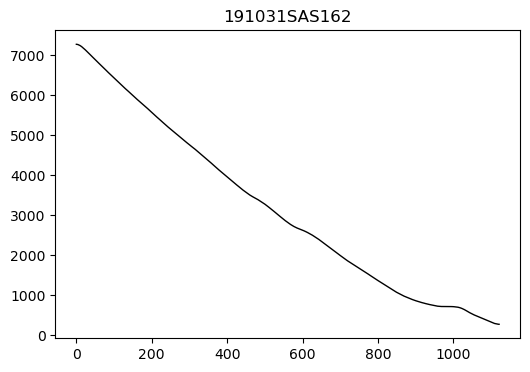

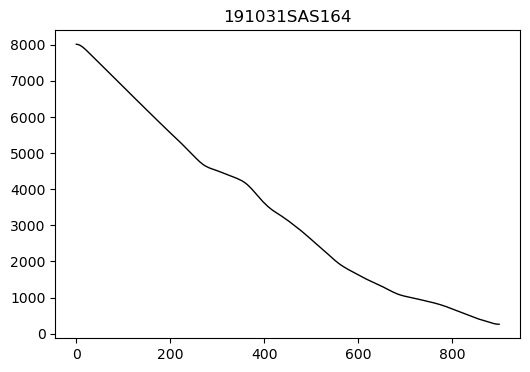

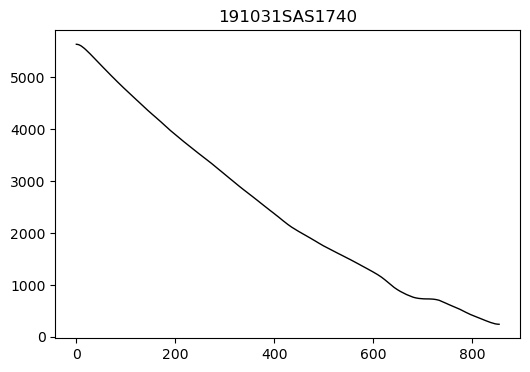

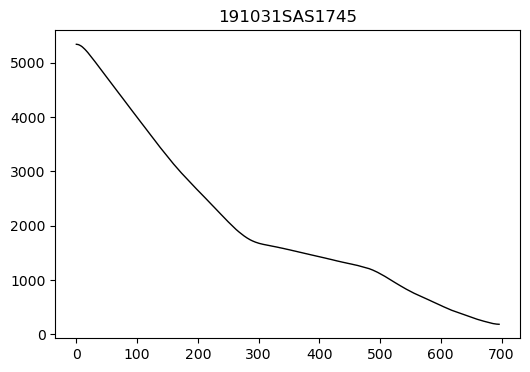

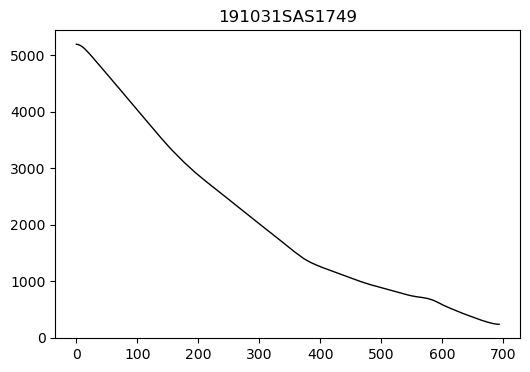

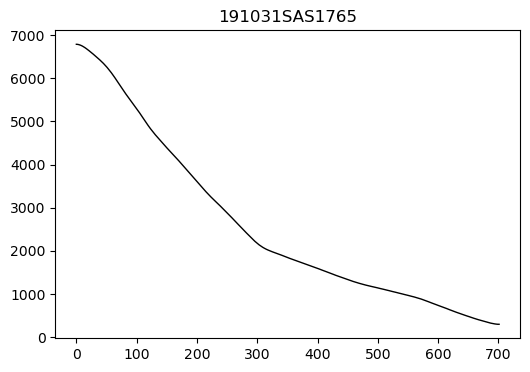

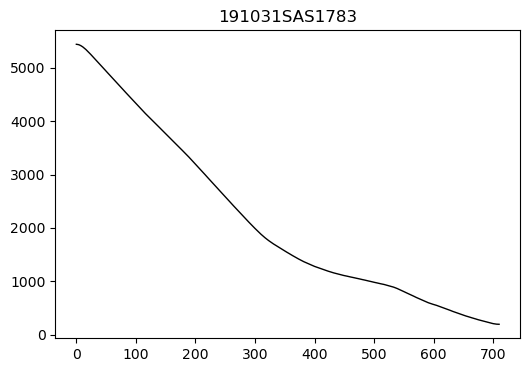

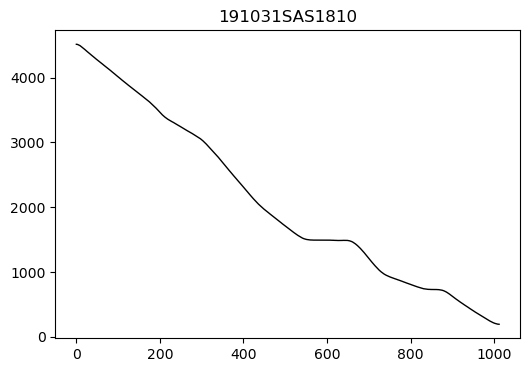

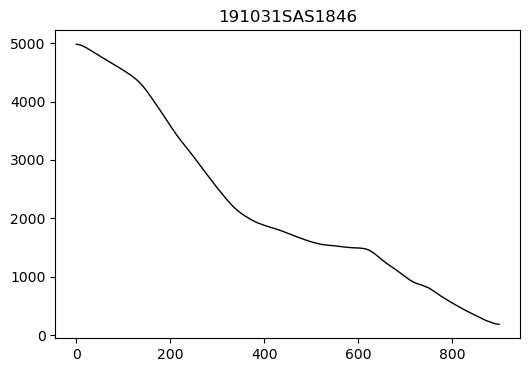

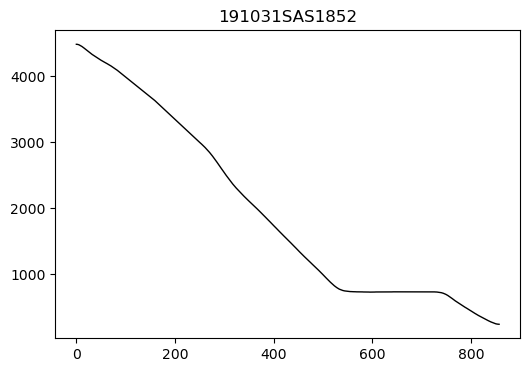

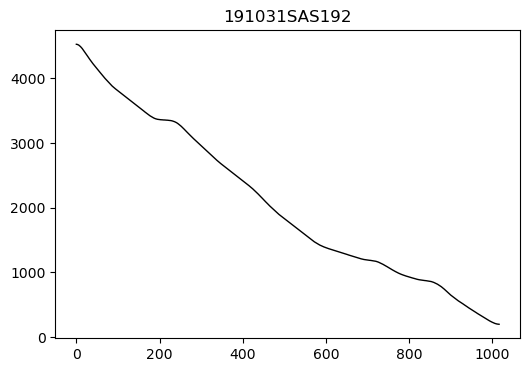

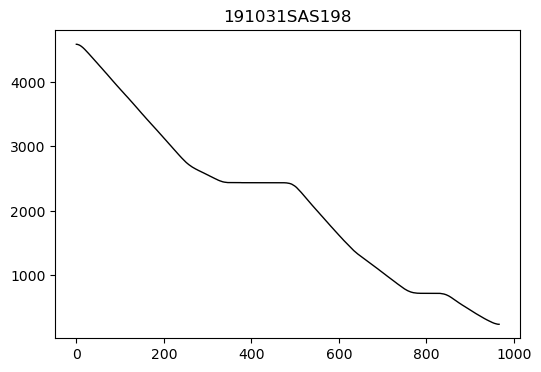

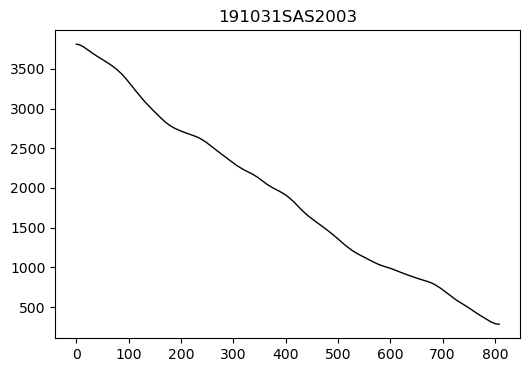

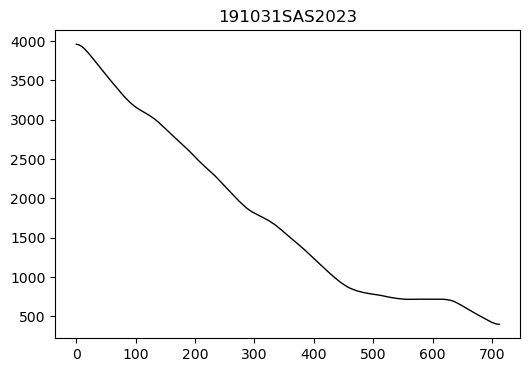

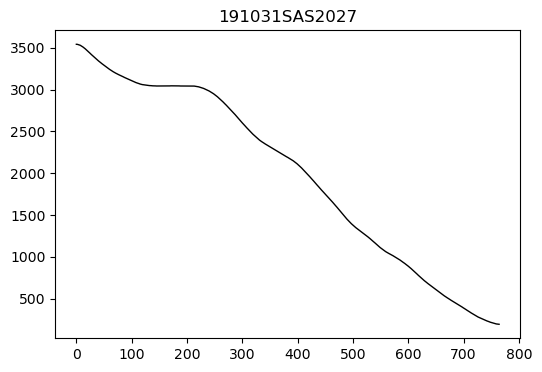

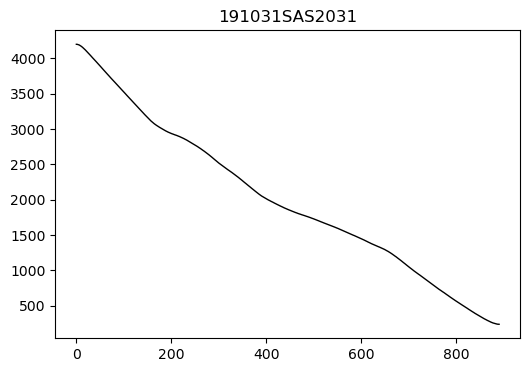

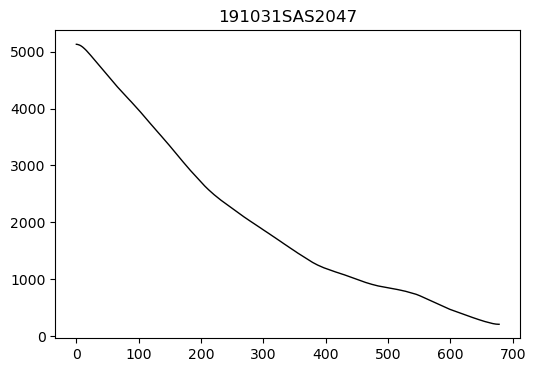

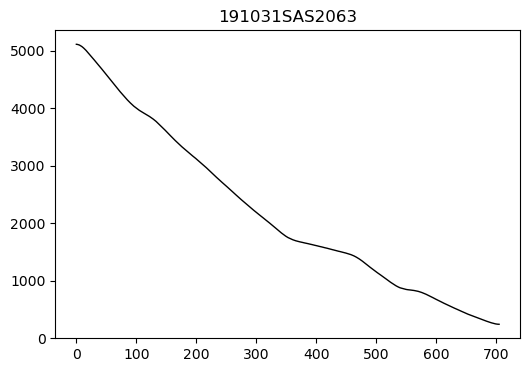

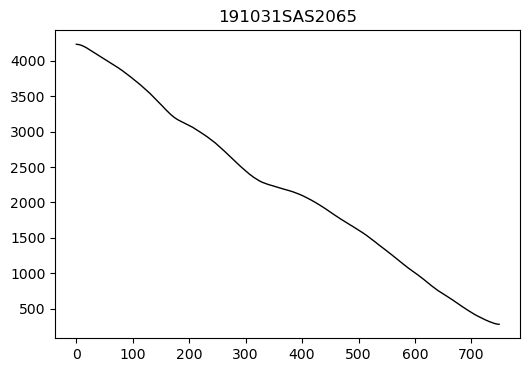

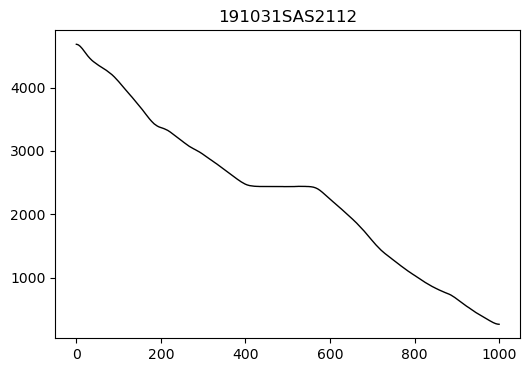

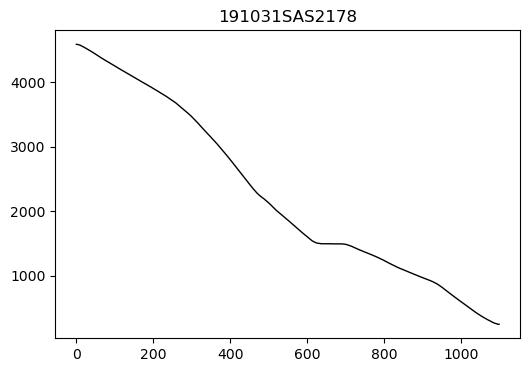

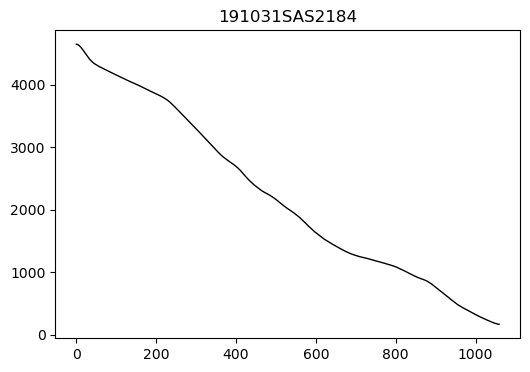

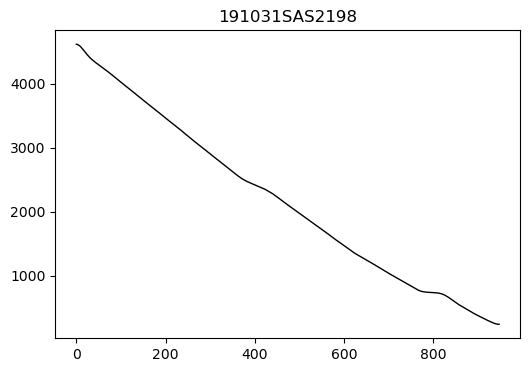

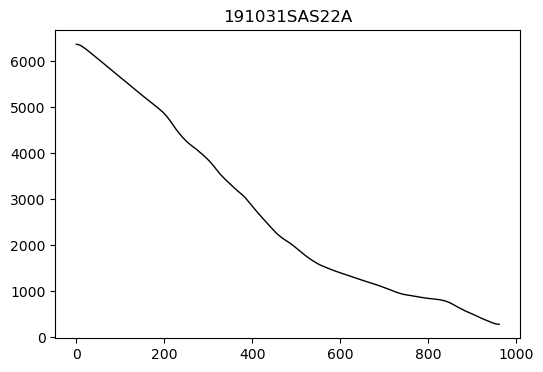

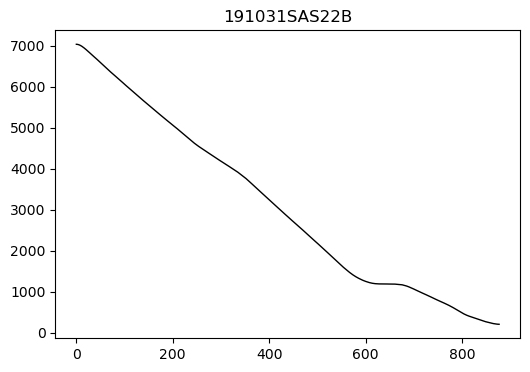

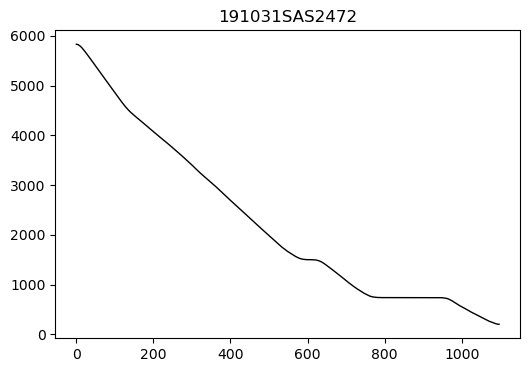

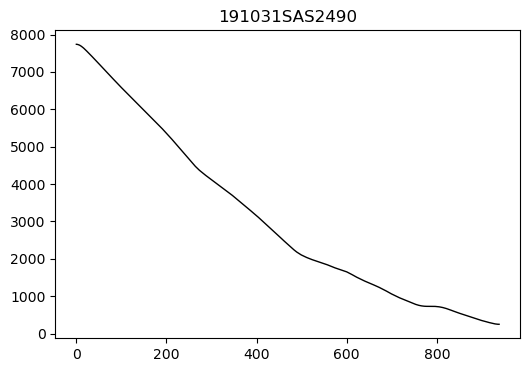

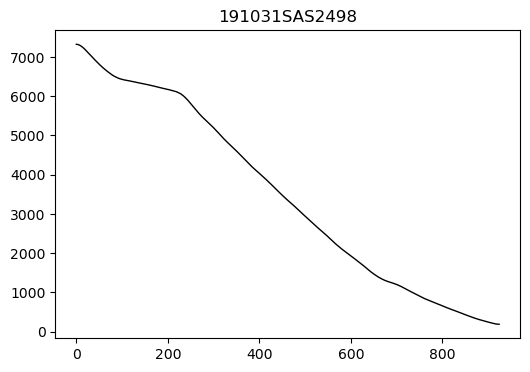

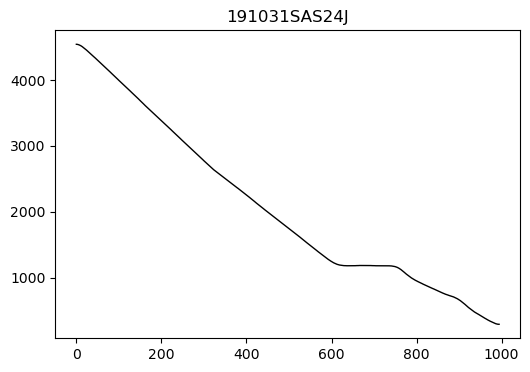

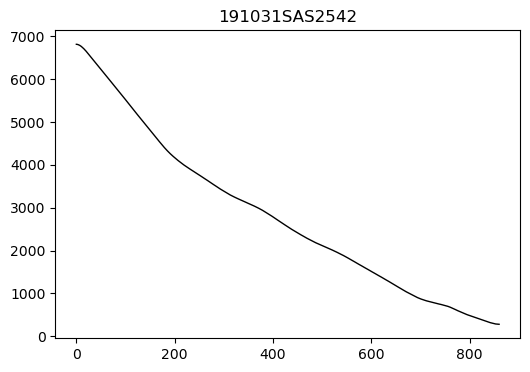

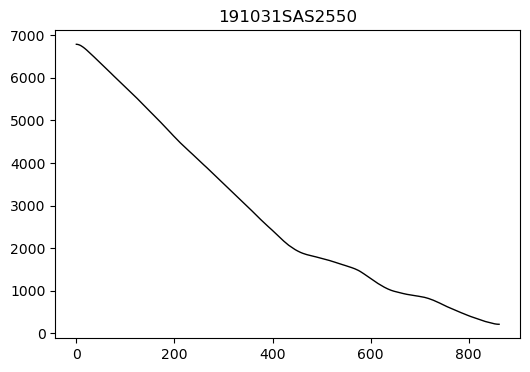

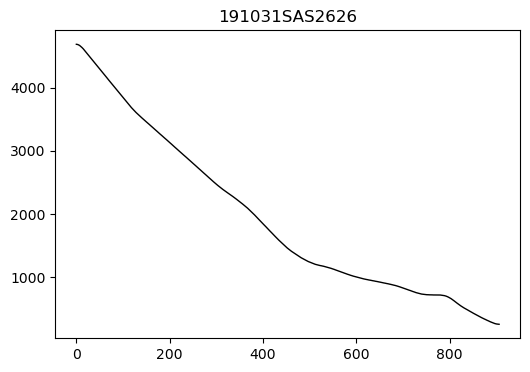

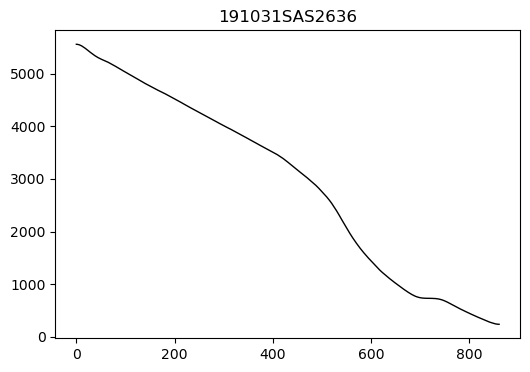

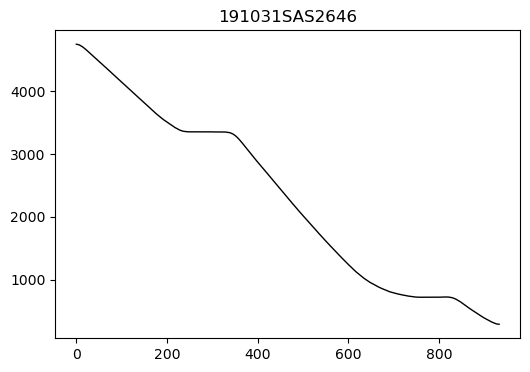

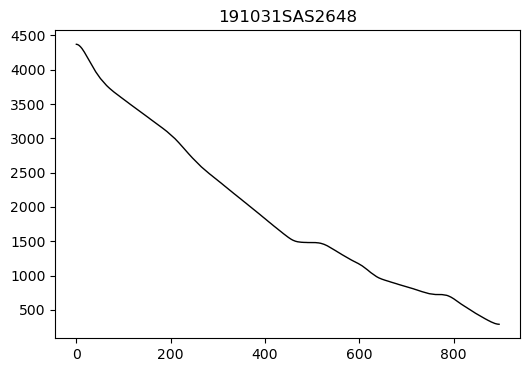

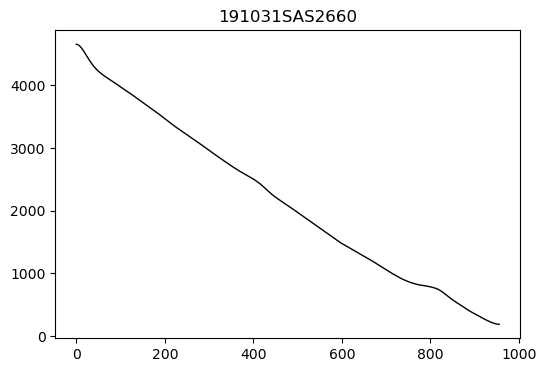

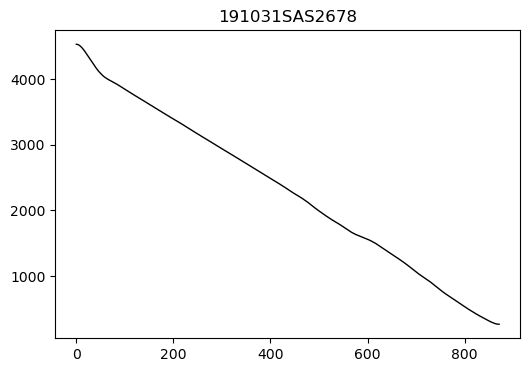

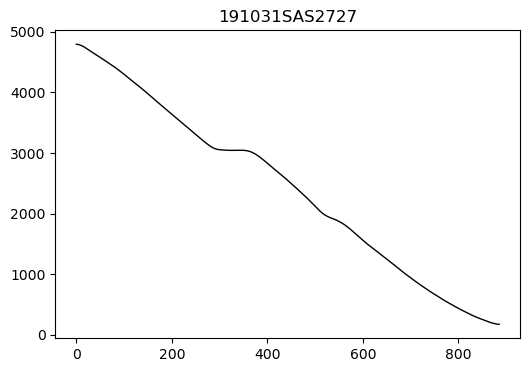

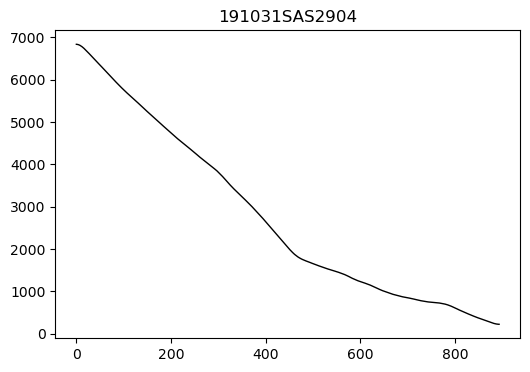

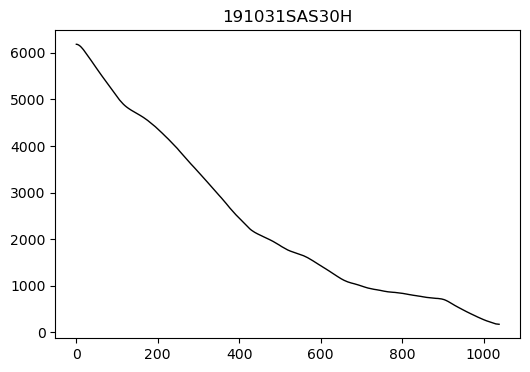

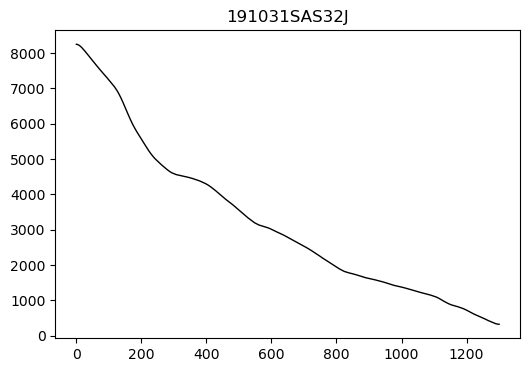

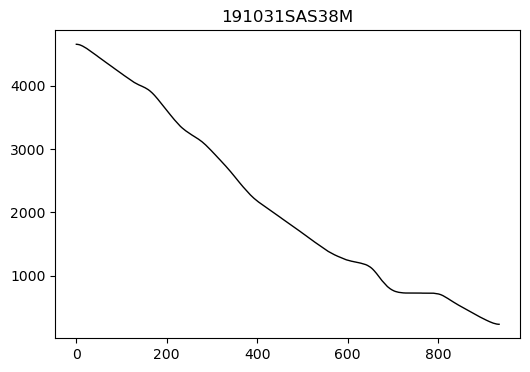

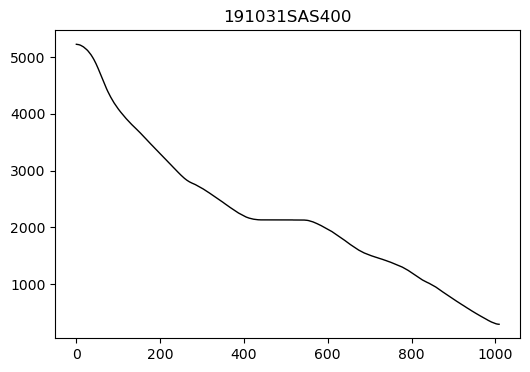

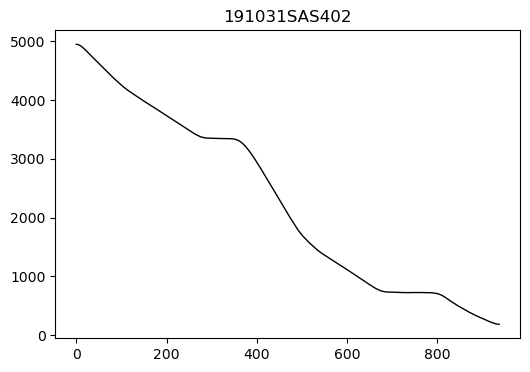

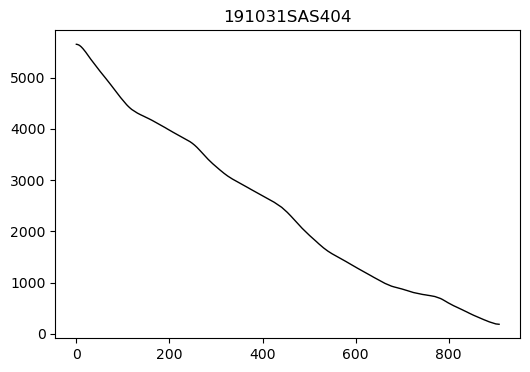

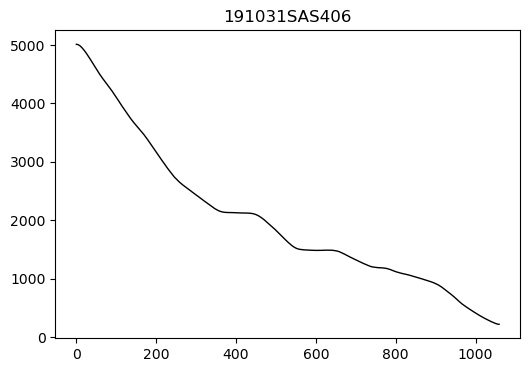

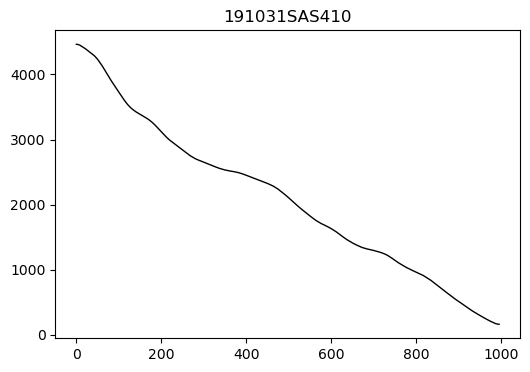

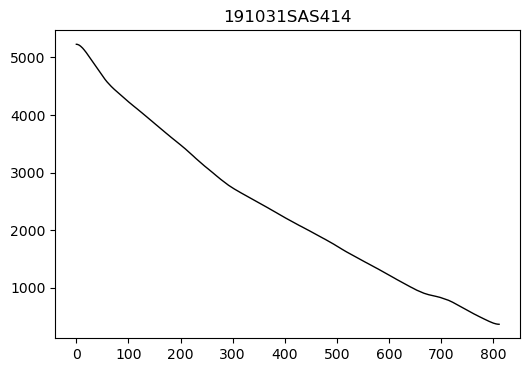

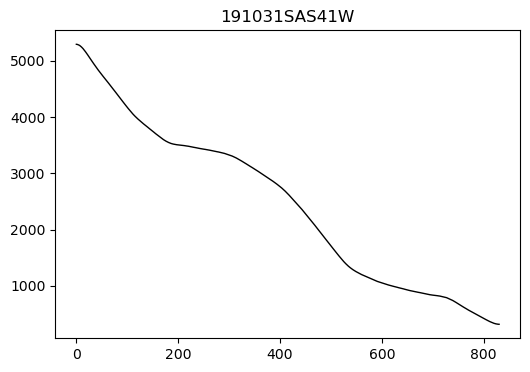

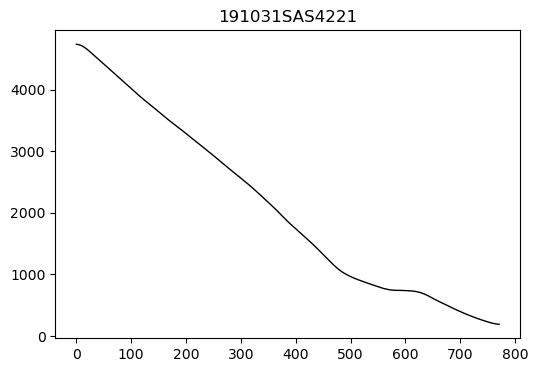

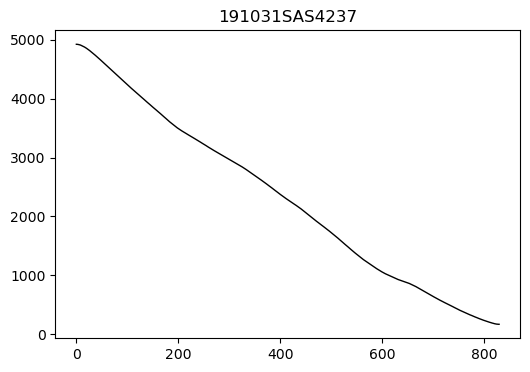

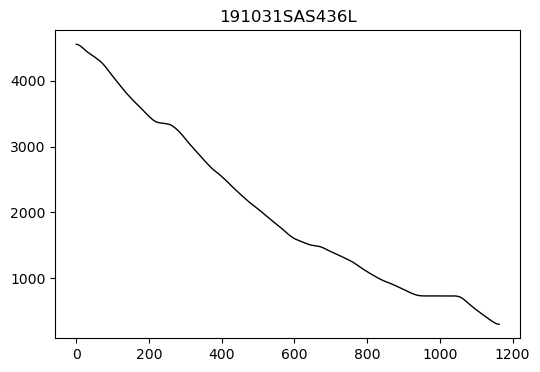

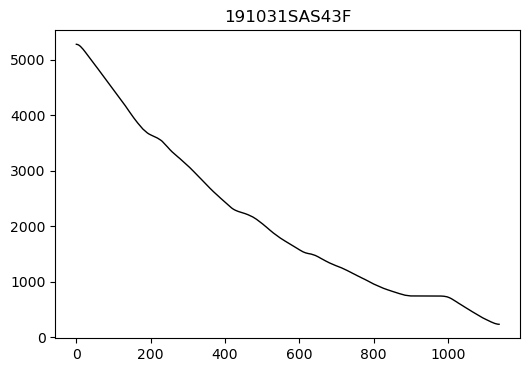

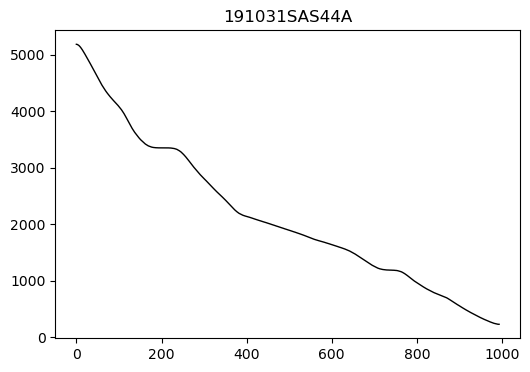

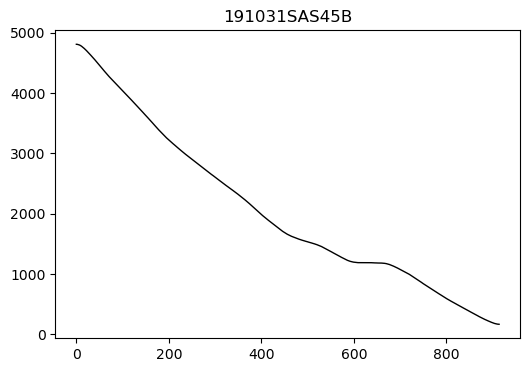

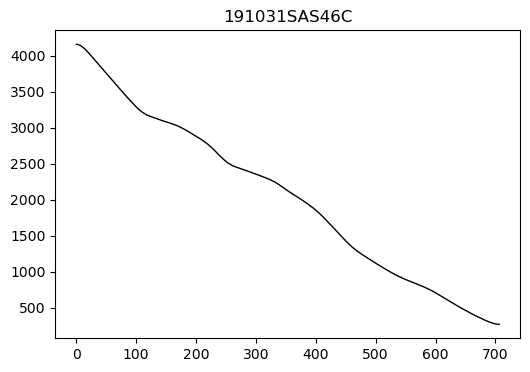

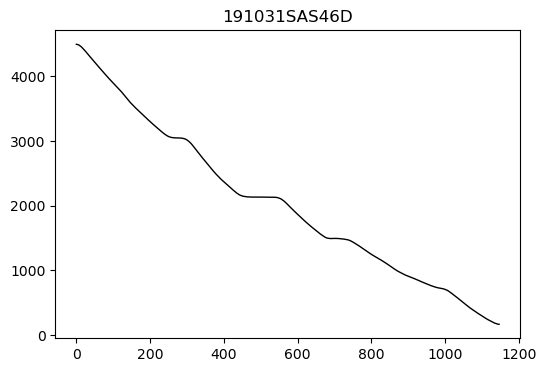

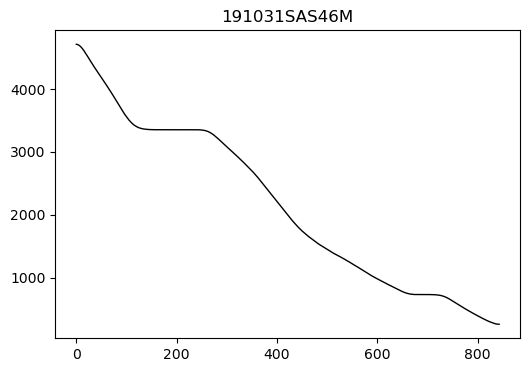

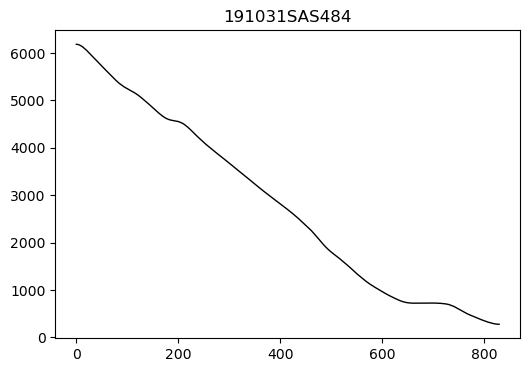

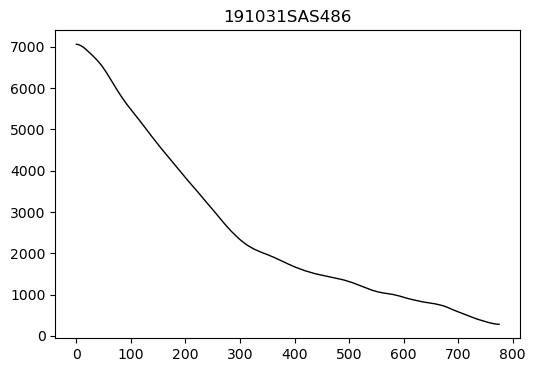

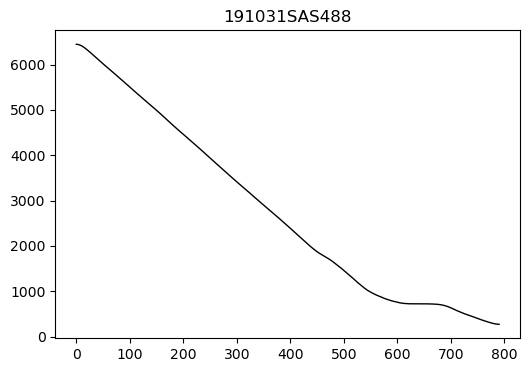

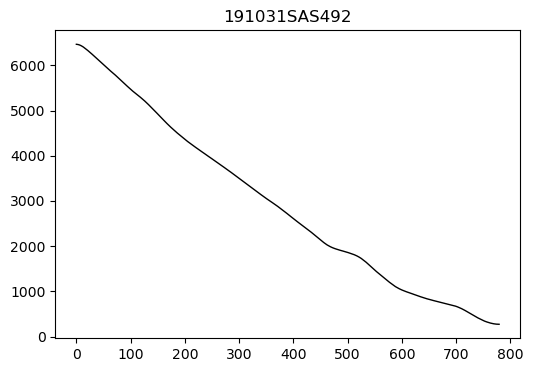

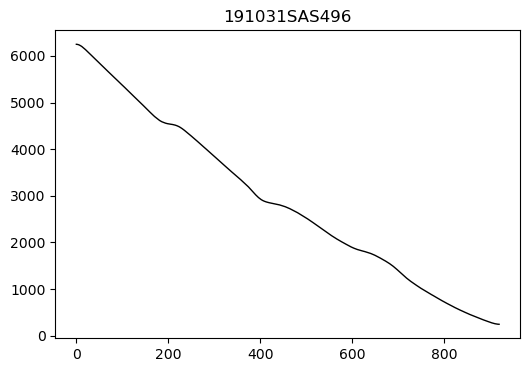

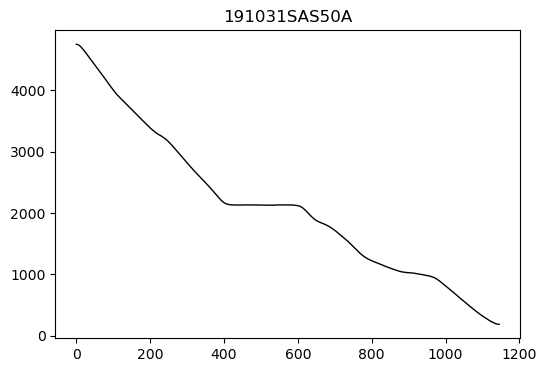

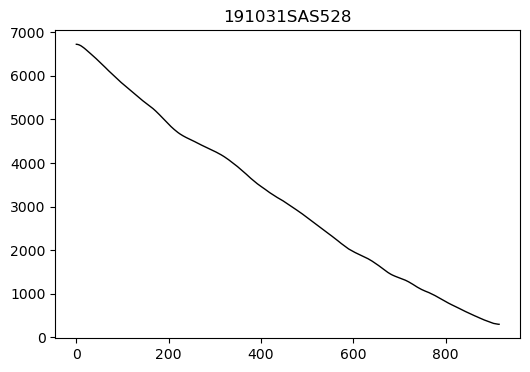

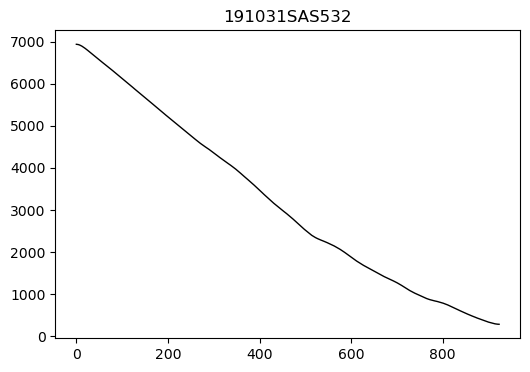

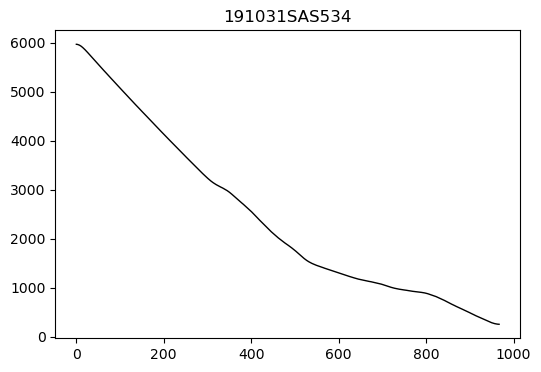

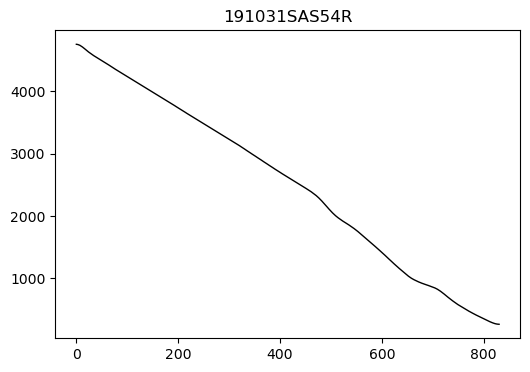

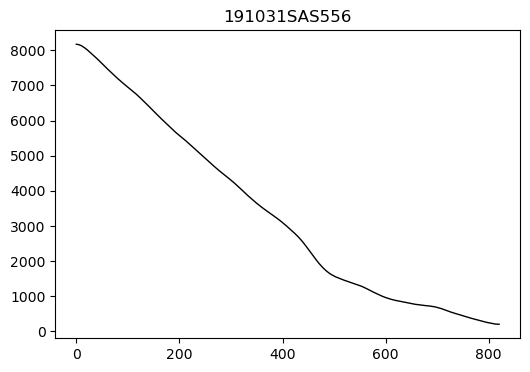

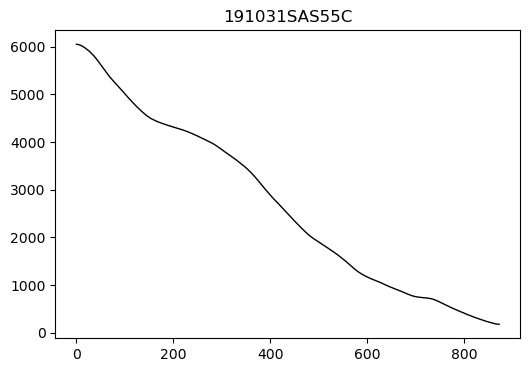

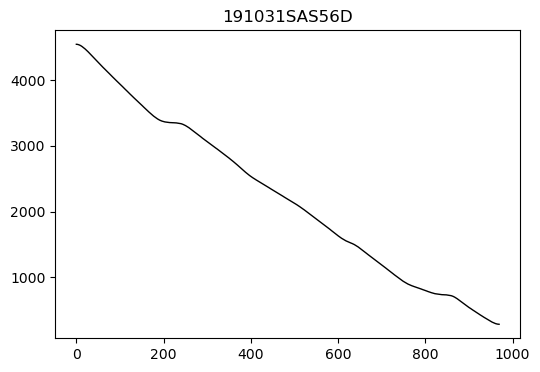

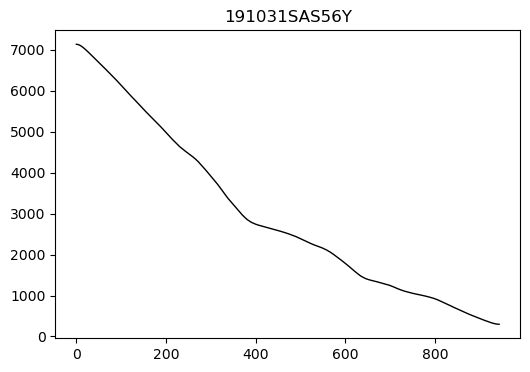

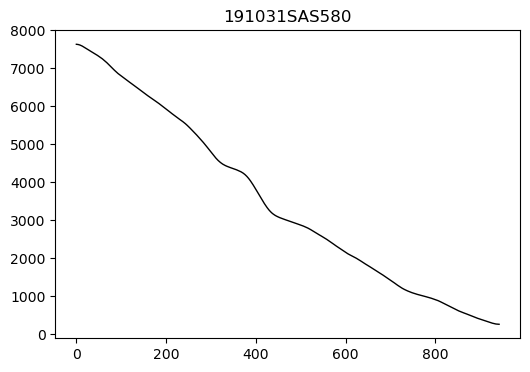

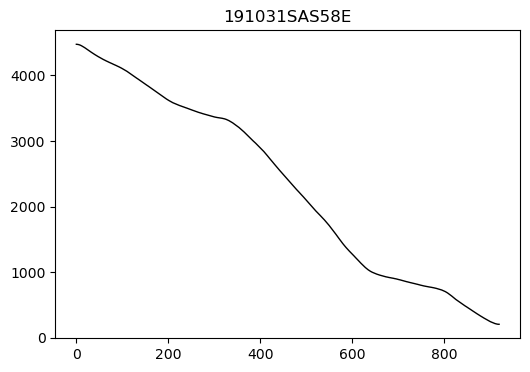

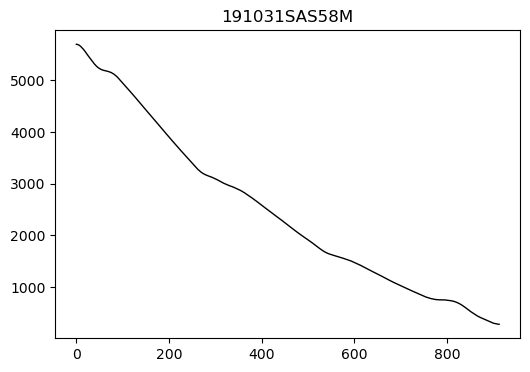

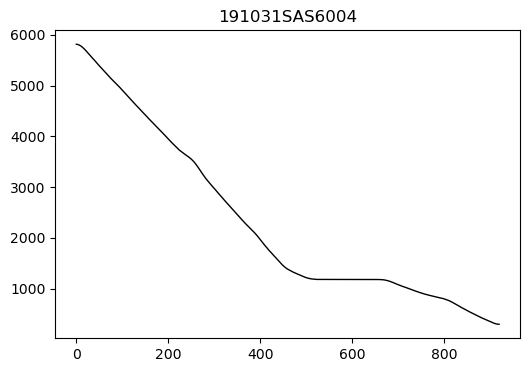

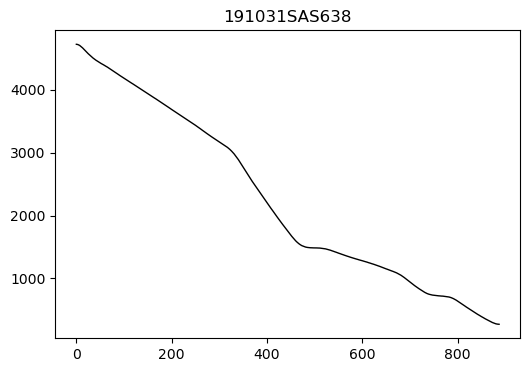

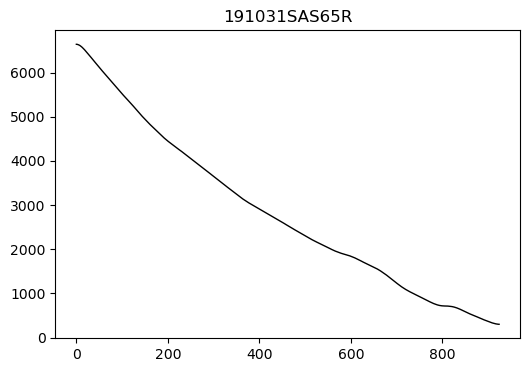

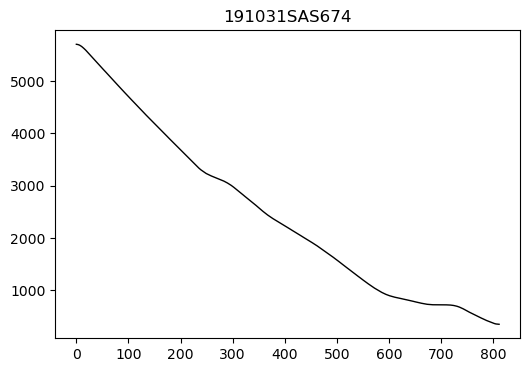

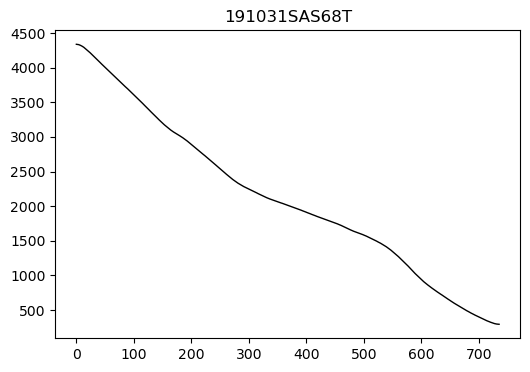

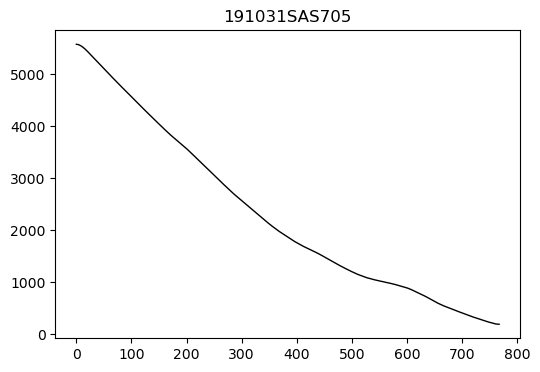

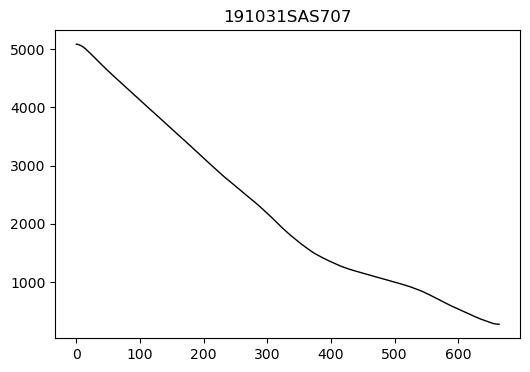

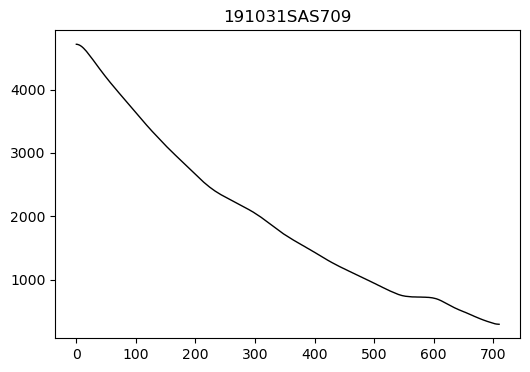

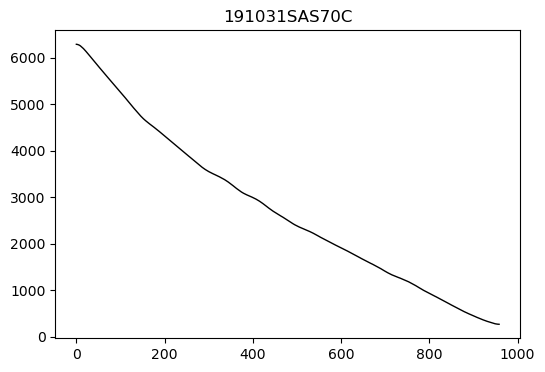

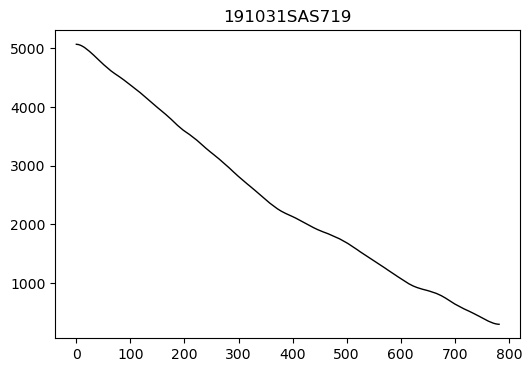

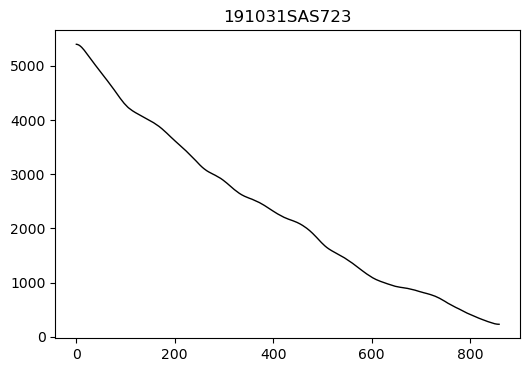

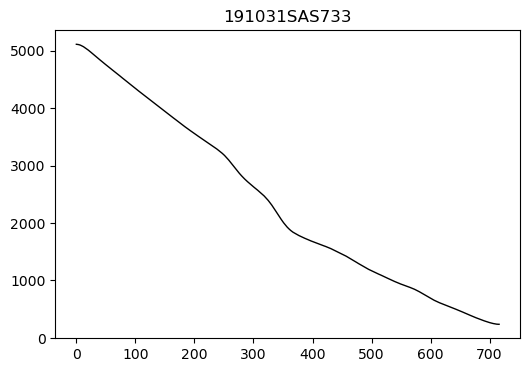

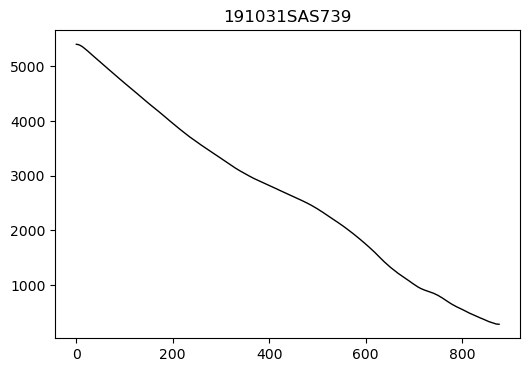

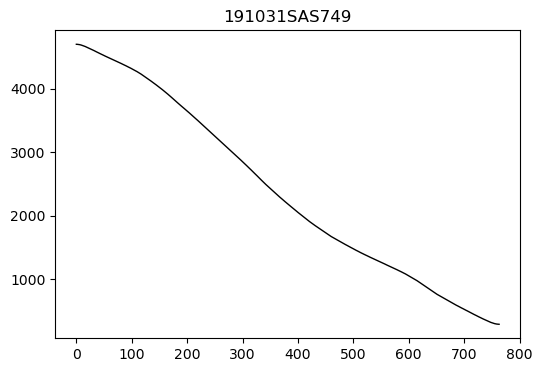

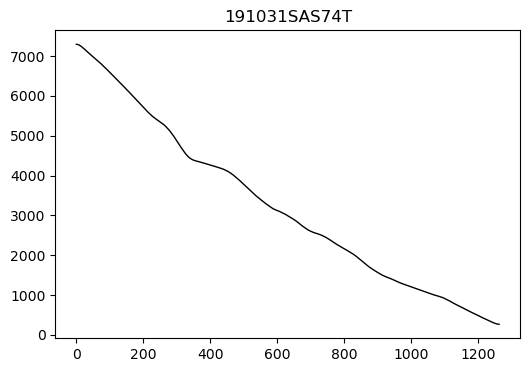

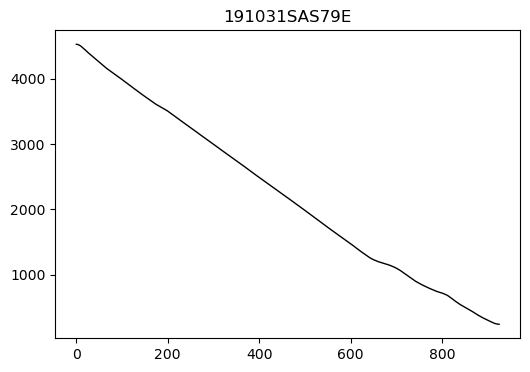

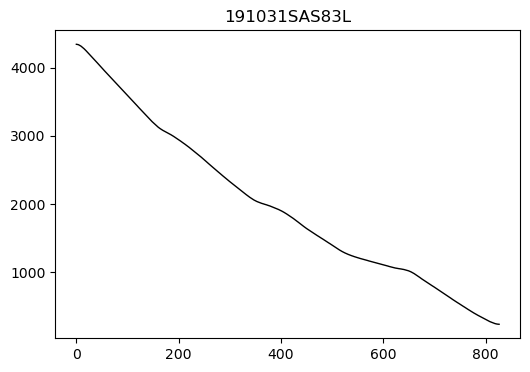

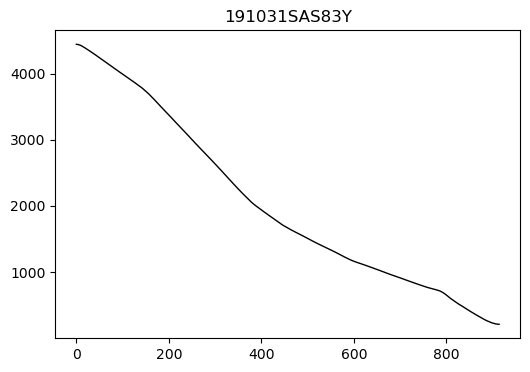

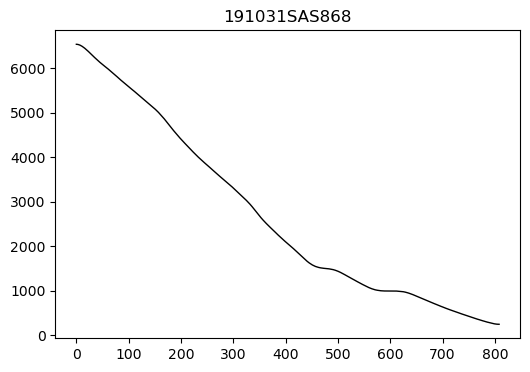

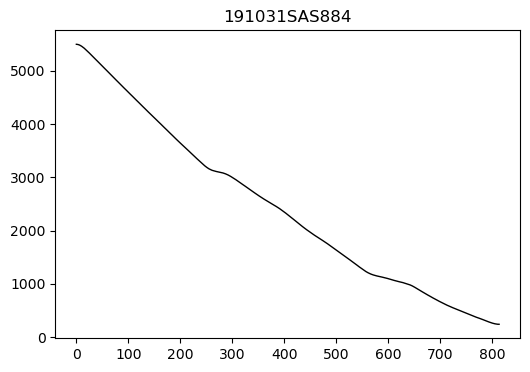

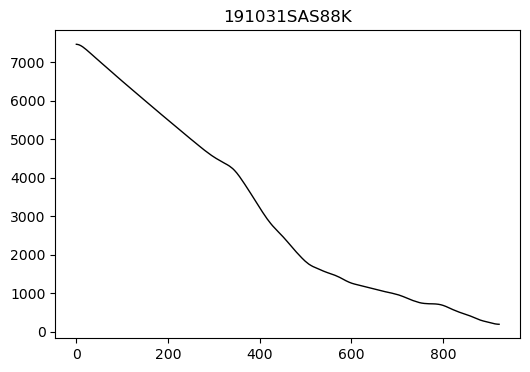

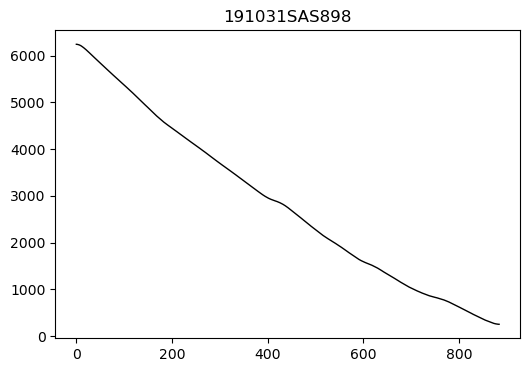

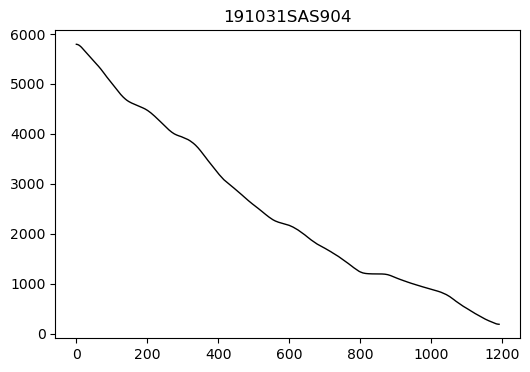

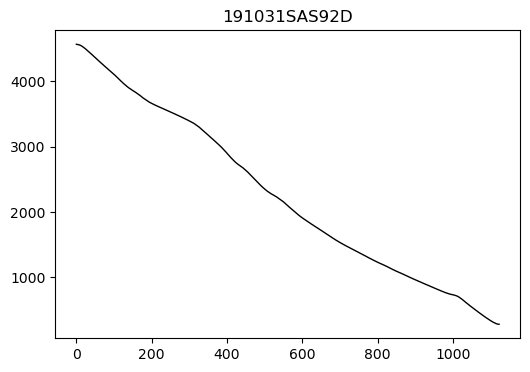

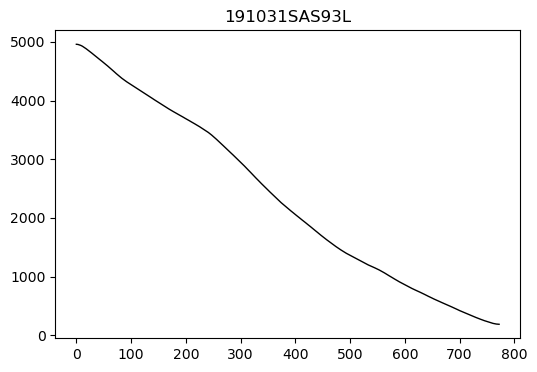

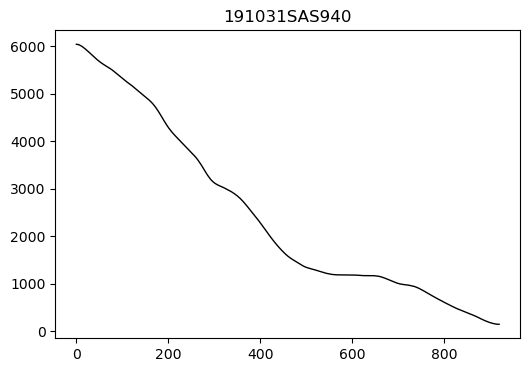

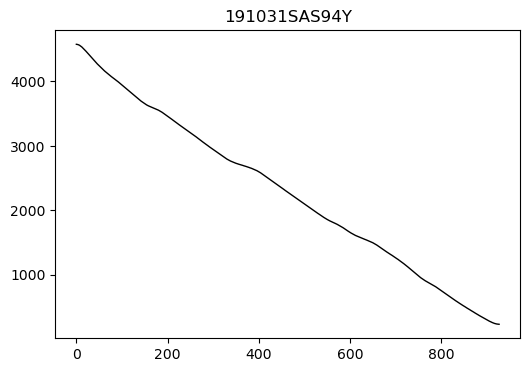

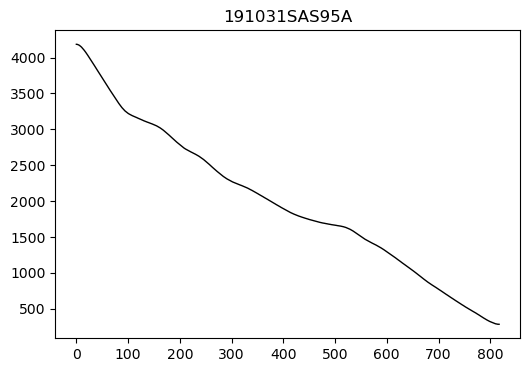

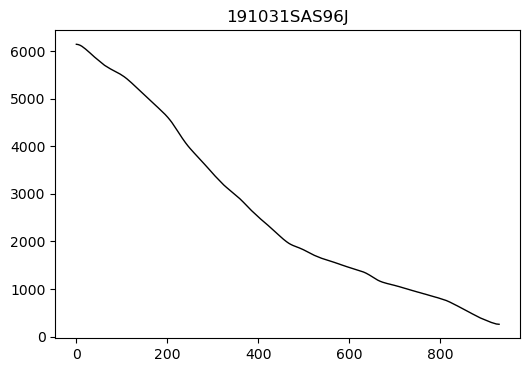

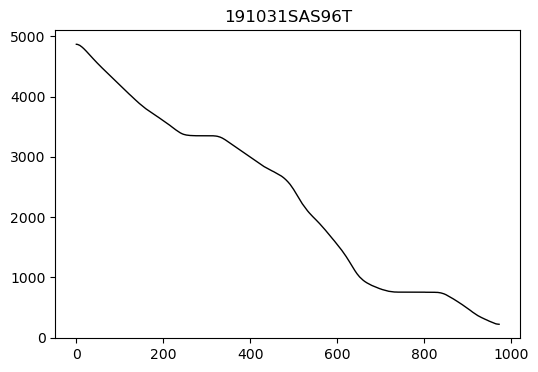

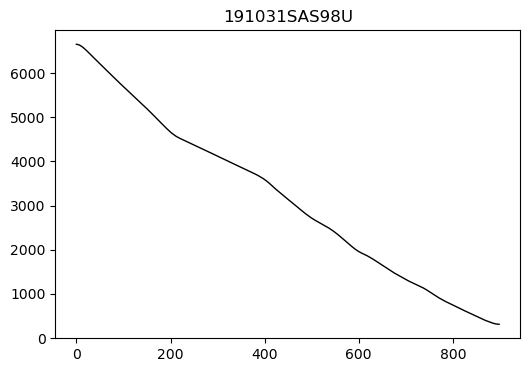

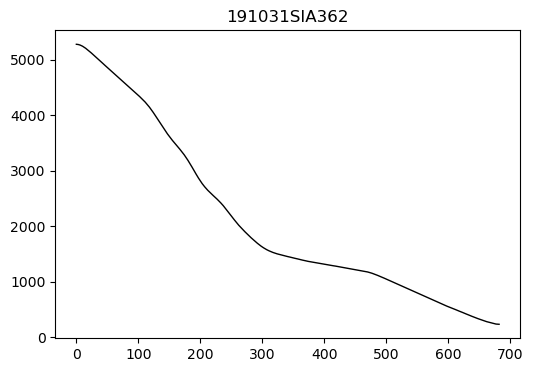

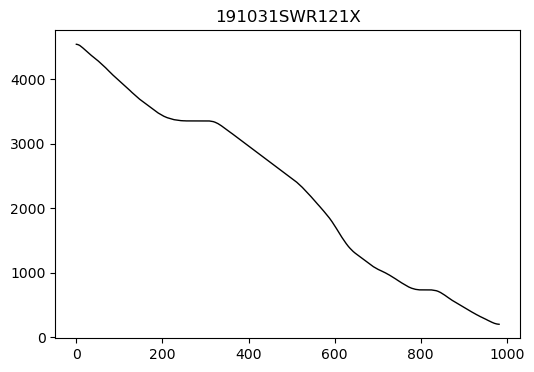

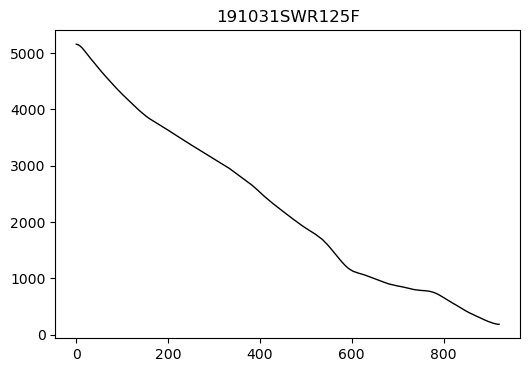

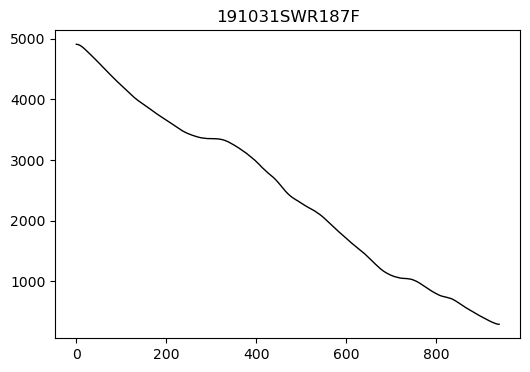

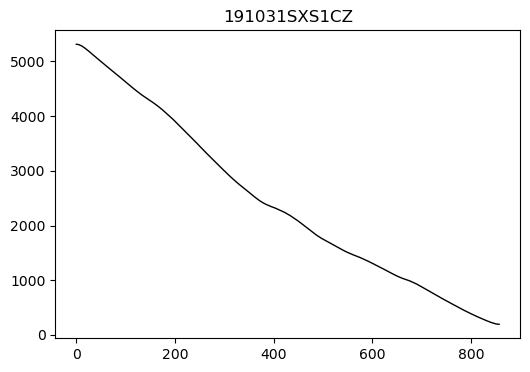

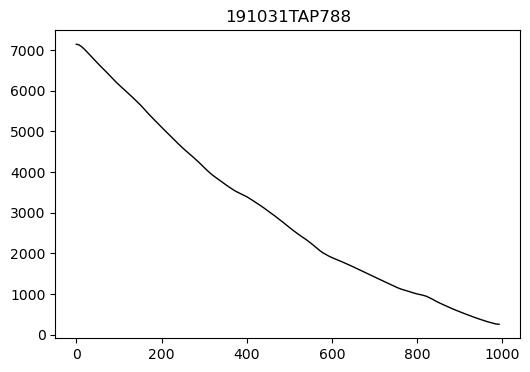

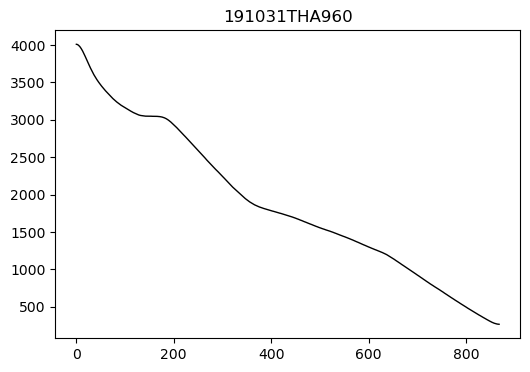

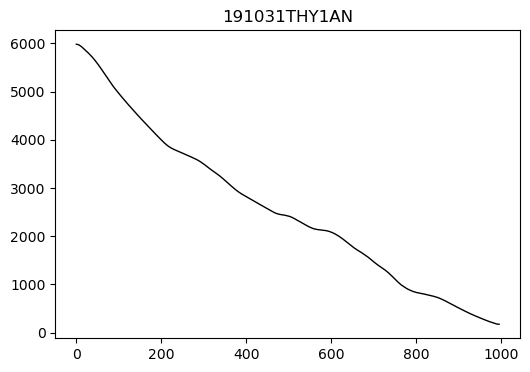

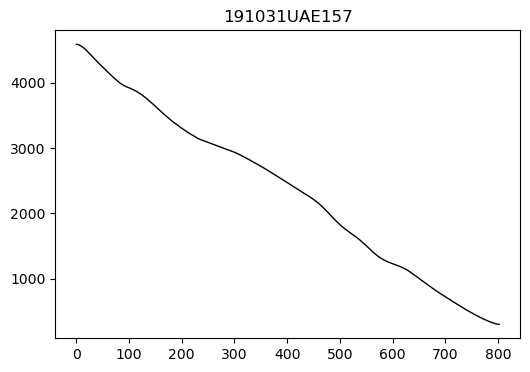

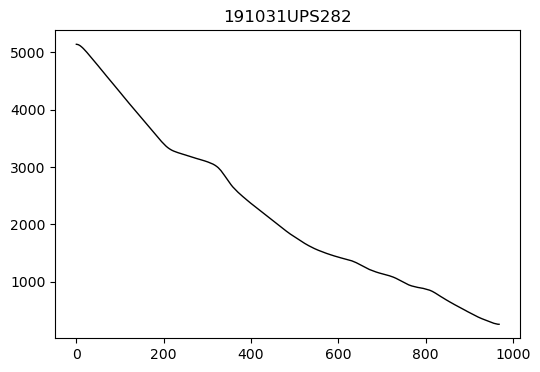

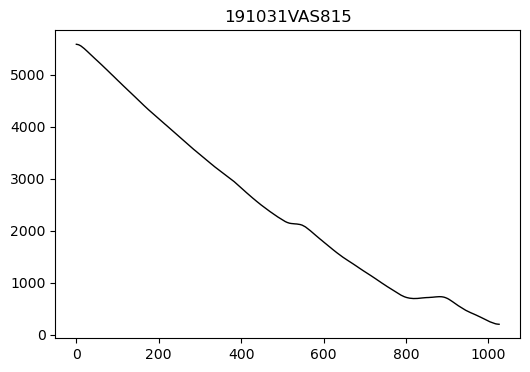

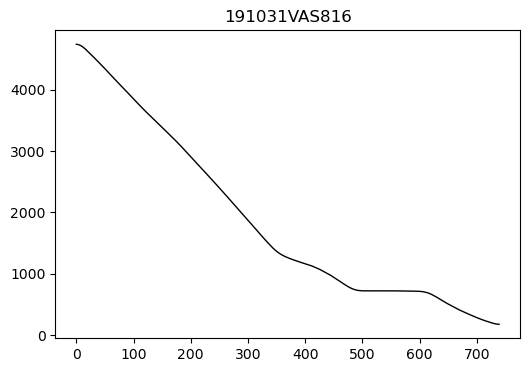

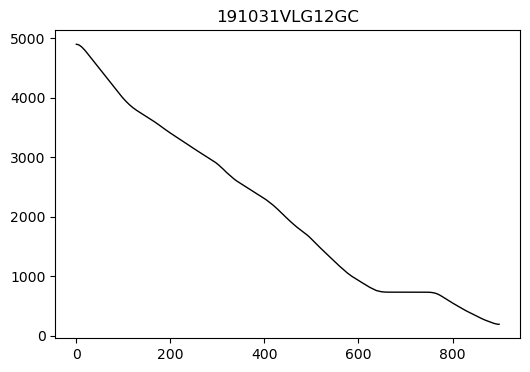

In [13]:
if os.path.exists("TempFigures"):
    try:
        shutil.rmtree("TempFigures")
    except OSError as e:
        print("Error: %s - %s." % (e.filename, e.strerror))
        
os.makedirs("TempFigures")

#for flight_id in dif_set:
    #flight_df = filtered_df[filtered_df.index.get_level_values('flightId') == flight_id]
    #flight_df = downloaded_df[downloaded_df.index.get_level_values('flightId') == flight_id]
    #flight_df = smoothed_df[smoothed_df.index.get_level_values('flightId') == flight_id]

for flight_id, flight_df in filtered2_df.groupby(level='flightId'):
    plot_vertical_profile_flight(flight_df, flight_id)
    plt.savefig("TempFigures/" + flight_id + ".png")

In [14]:
#'191031BCS6789', '191031EJU96LM', '191031IBK8WB', '191031DLH5MM', '191031NAX820', '191031SAS1021',
#'191031NAX4312', '191031THY1AN', '191031IBK210', '191031FIN1NX', '191031KLM23C', '191031SAS864', 
#'191031SAS38M', '191031SAS42E', '191031SAS79E', '191031UAE157', '191031SAS898', '191031IBK4MF', 
#'191031SAS183C', '191031SAS723', '191031SEJPX', '191031IBK5554', '191031IBK216', '191031SAS1430'

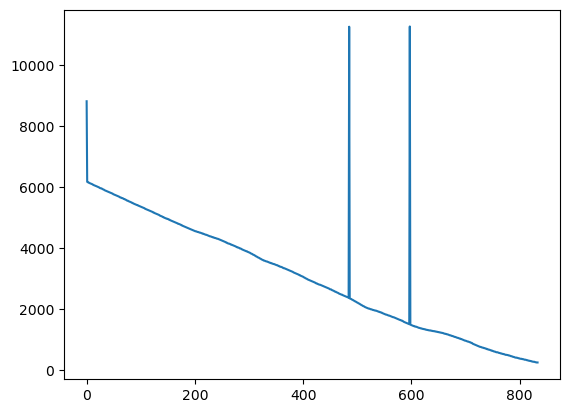

In [15]:
flight_id = "191031NAX812"
flight_df = filtered_df[filtered_df.index.get_level_values('flightId') == flight_id]
#print(flight_df)

import numpy as np

altitudes = flight_df["altitude"].values

plt.plot(range(0, len(altitudes)), altitudes)

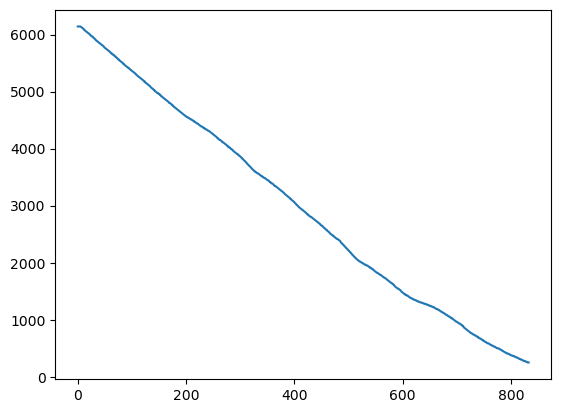

In [16]:
flight_id = "191031NAX812"
flight_df = filtered_df[filtered_df.index.get_level_values('flightId') == flight_id]

from scipy.signal import medfilt
import numpy as np

altitudes = flight_df["altitude"].values
new_altitudes = medfilt(altitudes,11)
plt.plot(range(0, len(new_altitudes)), new_altitudes)

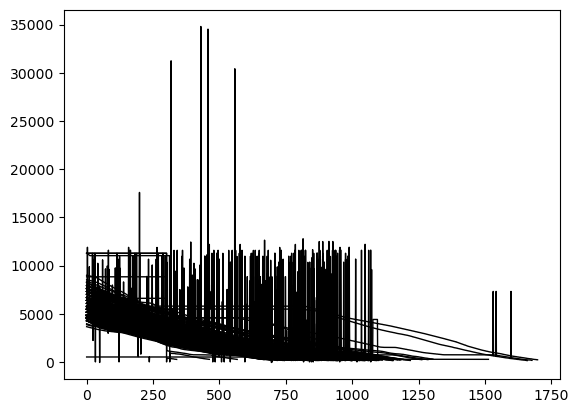

In [17]:
plot_vertical_profile(downloaded_df)

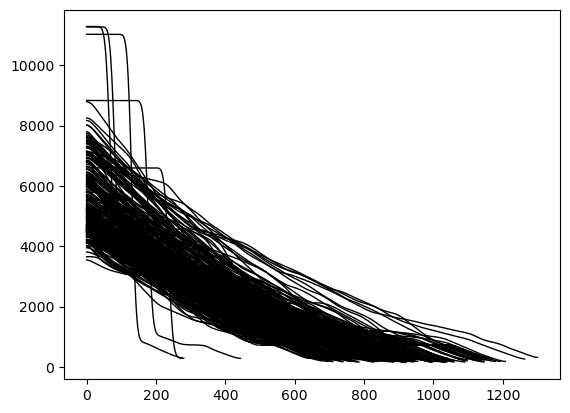

In [18]:
plot_vertical_profile(filtered2_df)

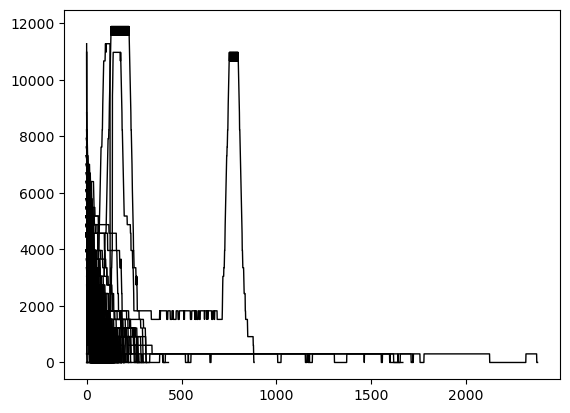

In [23]:
plot_vertical_profile(tracks_df)